# 1.PROBLEM DESCRIPTION

A retail company wants to predict the potential level of customer retention for its customers. The datasets containing historical transaction data of its customers, The target variable, potential level of customer retention, is a categorical variable with three possible values: high, medium, or low. The model will be trained on a labeled dataset, where each customer has been assigned a retention potential level based on their past behavior.The objective is to build a classification model that can accurately predict the retention potential level of new customers based on their transactional features.

****************************************************************************

**CustomerID**:  This is a unique identifier for each customer. It can be used to group customer data and track individual behavior over time.

**City**: This feature provides information about where the customer is located. Depending on the type of business, this may or may not be useful for predicting retention

**DateOfRegistration**: This feature tells us when the customer first registered with the company.

**OnlineCommunication**: This feature indicates whether the customer has communicated with the company online.


**AutomaticRefill**: This feature indicates whether the customer has opted for automatic refill of products. 

**DoorstepDelivery**: This feature indicates whether the customer has opted for doorstep delivery of products. 

**PreferredDeliveryDay**: This feature tells us the day of the week the customer prefers to receive deliveries.

**DateOfemail**: This feature tells us when an email was sent to the customer. 

**EmailType**: This feature tells us the type of email that was sent to the customer. 

**timestamp**: This feature tells us when an order was placed. 


**OrderQuantity**: This feature tells us the quantity of products ordered.

**RetentionPotential**: This is the target variable that we want to predict







*****************************************************************

# 2.Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 3.Data Collection

In [2]:
customer_train = pd.read_excel('/content/Customerdata_Train.xlsx') 
email_train = pd.read_excel('/content/Emaildata_Train.xlsx')
retpot_train = pd.read_excel('/content/Train.xlsx')
transac_train = pd.read_excel('/content/transactionsdata_Train.xlsx')

# 4.Understanding Data

In [3]:
print('shape of customer_train',customer_train.shape)

shape of customer_train (23820, 7)


In [4]:
print('shape of email_train',email_train.shape)

shape of email_train (517672, 6)


In [5]:
print('shape of retpot_train',retpot_train.shape)

shape of retpot_train (23820, 2)


In [6]:
print('shape of transac_train',transac_train.shape)

shape of transac_train (104755, 4)


In [7]:
#checking for null values
customer_train.isna().sum().sum()

0

In [8]:
email_train.isna().sum().sum()

0

In [9]:
retpot_train.isna().sum().sum()

0

In [10]:
transac_train.isna().sum().sum()

0

**Observations**

---


1. **So, The shape of four datsets are not same.**
2. **Target column (Retention Potential) consits of 23820 rows,So we have to filter out the datsets and then merge the datsets**
3. **There are no null values in the four**

###Customer Data

In [11]:
customer_train.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday


In [12]:
customer_train.columns 

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')

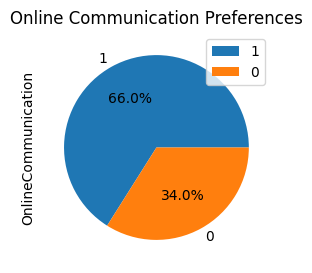

In [13]:
import matplotlib.pyplot as plt

customer_train['OnlineCommunication'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(3, 3))
plt.title('Online Communication Preferences')
plt.legend()
plt.show()

In [14]:
#checking for datatypes
customer_train.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
dtype: object



##Email Data



In [15]:
email_train.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [16]:
email_train.tail()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
517667,C36140,2018-01-18,CustomizedEmail,14:04:44,yes,yes
517668,C36140,2018-01-21,CustomizedEmail,16:17:16,no,no
517669,C36140,2018-01-20,CustomizedEmail,12:17:34,yes,yes
517670,C36140,2018-01-20,CustomizedEmail,16:31:18,yes,no
517671,C36140,2018-01-21,CustomizedEmail,14:23:16,yes,yes


In [17]:
email_train.columns

Index(['CustomerID', 'DateOfemail', 'EmailType', 'timestamp', 'MailOpened',
       'MailClicked'],
      dtype='object')

In [18]:
email_train.dtypes

CustomerID     object
DateOfemail    object
EmailType      object
timestamp      object
MailOpened     object
MailClicked    object
dtype: object

In [19]:
# value counts for Emailtype
email_train['EmailType'].value_counts()

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

In [20]:
# value counts for MailOpened
email_train['MailOpened'].value_counts()

no     369812
yes    147860
Name: MailOpened, dtype: int64

In [21]:
# value counts for MailClicked
email_train['MailClicked'].value_counts()

no               466011
yes               27841
NotApplicable     23820
Name: MailClicked, dtype: int64


**Observations**
---





1. **A Customer will recieve welcome mail but might not be customized email**
2. **If a customer receives customized mail might also receive welcome mail**
3. **So we can filter out the datasets by above situation**

In [22]:
# combine the 'Date of email' and 'Time' columns into a single datetime column
email_train['DateOfemail'] = pd.to_datetime(email_train['DateOfemail'])

In [23]:
email_train.drop('timestamp',axis=1,inplace=True)

In [24]:
#filtering persons who received only customized mail
customized_mail=email_train[email_train['EmailType'] == 'CustomizedEmail']

In [25]:
customized_mail.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
23820,C16368,2013-05-20,CustomizedEmail,yes,no
23821,C16368,2013-02-05,CustomizedEmail,yes,no
23822,C16368,2012-11-26,CustomizedEmail,yes,no
23823,C16368,2013-05-30,CustomizedEmail,yes,no
23824,C16368,2013-05-18,CustomizedEmail,yes,no


In [26]:
# Group the data by CustomerID and EmailType, and calculate the number of emails sent, the first email date, and the last email date
customized_mail_1 = customized_mail.groupby(['CustomerID', 'EmailType']).agg(
    num_emails=('CustomerID', 'count'), # Number of emails
    first_email_date=('DateOfemail', 'min'), # First email date
    last_email_date=('DateOfemail', 'max') # Last email date
)

# Reset the index of the resulting DataFrame
customized_mail_1 = customized_mail_1.reset_index(drop=False)

In [27]:
customized_mail_1

,CustomerID,EmailType,num_emails,first_email_date,last_email_date
0,C12116,CustomizedEmail,31,2013-09-24,2013-10-09
1,C12119,CustomizedEmail,41,2013-04-22,2013-10-21
2,C12122,CustomizedEmail,45,2012-11-13,2013-04-09
3,C12123,CustomizedEmail,28,2013-11-16,2014-01-10
4,C12124,CustomizedEmail,32,2013-10-31,2013-11-06
...,...,...,...,...,...
14106,C42181,CustomizedEmail,47,2011-08-14,2013-10-29
14107,C42182,CustomizedEmail,49,2012-08-31,2013-11-28
14108,C42183,CustomizedEmail,41,2017-08-07,2017-08-13
14109,C42185,CustomizedEmail,43,2011-03-05,2011-12-30


In [28]:
customized_mail.dtypes

CustomerID             object
DateOfemail    datetime64[ns]
EmailType              object
MailOpened             object
MailClicked            object
dtype: object

In [29]:
customized_mail_1.dtypes

CustomerID                  object
EmailType                   object
num_emails                   int64
first_email_date    datetime64[ns]
last_email_date     datetime64[ns]
dtype: object

In [30]:
customized_mail_1['DateOfemail'] = customized_mail_1['last_email_date']

In [31]:
customized_mail_1

,CustomerID,EmailType,num_emails,first_email_date,last_email_date,DateOfemail
0,C12116,CustomizedEmail,31,2013-09-24,2013-10-09,2013-10-09
1,C12119,CustomizedEmail,41,2013-04-22,2013-10-21,2013-10-21
2,C12122,CustomizedEmail,45,2012-11-13,2013-04-09,2013-04-09
3,C12123,CustomizedEmail,28,2013-11-16,2014-01-10,2014-01-10
4,C12124,CustomizedEmail,32,2013-10-31,2013-11-06,2013-11-06
...,...,...,...,...,...,...
14106,C42181,CustomizedEmail,47,2011-08-14,2013-10-29,2013-10-29
14107,C42182,CustomizedEmail,49,2012-08-31,2013-11-28,2013-11-28
14108,C42183,CustomizedEmail,41,2017-08-07,2017-08-13,2017-08-13
14109,C42185,CustomizedEmail,43,2011-03-05,2011-12-30,2011-12-30


**The email engagement metrics provide information about how actively customers are engaging with the emails they receive from the retailer. By analyzing these metrics, retailers can identify which customers are most engaged and are therefore more likely to be retained over time.**

In [32]:
# Calculate email engagement metrics for each customer
email_metrics = customized_mail.groupby("CustomerID").agg(
    num_emails=("CustomerID", "count"),
    num_emails_opened=("MailOpened", lambda x: sum(x == "yes")),
    num_emails_clicked=("MailClicked", lambda x: sum(x == "yes")),
)




In [33]:
email_metrics

,num_emails,num_emails_opened,num_emails_clicked
CustomerID,,,
C12116,31,4,2
C12119,41,13,4
C12122,45,0,0
C12123,28,6,5
C12124,32,4,0
...,...,...,...
C42181,47,3,1
C42182,49,2,1
C42183,41,4,3


In [34]:
mail_data= pd.merge(customized_mail_1,email_metrics,on=['CustomerID','num_emails'],how='inner')

In [35]:
mail_data

,CustomerID,EmailType,num_emails,first_email_date,last_email_date,DateOfemail,num_emails_opened,num_emails_clicked
0,C12116,CustomizedEmail,31,2013-09-24,2013-10-09,2013-10-09,4,2
1,C12119,CustomizedEmail,41,2013-04-22,2013-10-21,2013-10-21,13,4
2,C12122,CustomizedEmail,45,2012-11-13,2013-04-09,2013-04-09,0,0
3,C12123,CustomizedEmail,28,2013-11-16,2014-01-10,2014-01-10,6,5
4,C12124,CustomizedEmail,32,2013-10-31,2013-11-06,2013-11-06,4,0
...,...,...,...,...,...,...,...,...
14106,C42181,CustomizedEmail,47,2011-08-14,2013-10-29,2013-10-29,3,1
14107,C42182,CustomizedEmail,49,2012-08-31,2013-11-28,2013-11-28,2,1
14108,C42183,CustomizedEmail,41,2017-08-07,2017-08-13,2017-08-13,4,3
14109,C42185,CustomizedEmail,43,2011-03-05,2011-12-30,2011-12-30,9,0


In [36]:
mail_data

,CustomerID,EmailType,num_emails,first_email_date,last_email_date,DateOfemail,num_emails_opened,num_emails_clicked
0,C12116,CustomizedEmail,31,2013-09-24,2013-10-09,2013-10-09,4,2
1,C12119,CustomizedEmail,41,2013-04-22,2013-10-21,2013-10-21,13,4
2,C12122,CustomizedEmail,45,2012-11-13,2013-04-09,2013-04-09,0,0
3,C12123,CustomizedEmail,28,2013-11-16,2014-01-10,2014-01-10,6,5
4,C12124,CustomizedEmail,32,2013-10-31,2013-11-06,2013-11-06,4,0
...,...,...,...,...,...,...,...,...
14106,C42181,CustomizedEmail,47,2011-08-14,2013-10-29,2013-10-29,3,1
14107,C42182,CustomizedEmail,49,2012-08-31,2013-11-28,2013-11-28,2,1
14108,C42183,CustomizedEmail,41,2017-08-07,2017-08-13,2017-08-13,4,3
14109,C42185,CustomizedEmail,43,2011-03-05,2011-12-30,2011-12-30,9,0


In [37]:
# Filter the DataFrame to include only customers who received a welcome email
welcome_mail = email_train[email_train['EmailType'] == 'WelcomeEmail']

# Filter out customers who also received a customized email
customized_mail = email_train[email_train['EmailType'] == 'CustomizedEmail']
customers_with_customized_mail = set(customized_mail['CustomerID'].unique())
welcome_mail = welcome_mail[~welcome_mail['CustomerID'].isin(customers_with_customized_mail)]

# Count the number of unique customers in the resulting DataFrame
num_customers = welcome_mail['CustomerID'].nunique()

In [38]:
welcome_mail.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable
15,C29837,2011-02-22,WelcomeEmail,yes,NotApplicable
18,C13691,2011-03-10,WelcomeEmail,yes,NotApplicable
25,C14905,2009-04-24,WelcomeEmail,yes,NotApplicable
30,C22750,2011-01-04,WelcomeEmail,yes,NotApplicable


In [39]:
# Group the data by CustomerID and EmailType, and calculate the number of emails sent, the first email date, and the last email date
welcome_mail_1 = welcome_mail.groupby(['CustomerID', 'EmailType']).agg(
    num_emails=('CustomerID', 'count'), # Number of emails
    first_email_date=('DateOfemail', 'min'), # First email date
    last_email_date=('DateOfemail', 'max') # Last email date
)

# Reset the index of the resulting DataFrame
welcome_mail_1 = welcome_mail_1.reset_index(drop=False)

In [40]:
welcome_mail_1

,CustomerID,EmailType,num_emails,first_email_date,last_email_date
0,C12117,WelcomeEmail,1,2013-12-05,2013-12-05
1,C12118,WelcomeEmail,1,2013-09-10,2013-09-10
2,C12120,WelcomeEmail,1,2014-01-10,2014-01-10
3,C12126,WelcomeEmail,1,2013-09-13,2013-09-13
4,C12137,WelcomeEmail,1,2017-10-05,2017-10-05
...,...,...,...,...,...
9704,C42180,WelcomeEmail,1,2011-12-16,2011-12-16
9705,C42184,WelcomeEmail,1,2011-09-06,2011-09-06
9706,C42186,WelcomeEmail,1,2013-11-23,2013-11-23
9707,C42187,WelcomeEmail,1,2013-09-15,2013-09-15


In [41]:
welcome_mail_1.dtypes

CustomerID                  object
EmailType                   object
num_emails                   int64
first_email_date    datetime64[ns]
last_email_date     datetime64[ns]
dtype: object

In [42]:
welcome_mail.dtypes

CustomerID             object
DateOfemail    datetime64[ns]
EmailType              object
MailOpened             object
MailClicked            object
dtype: object

In [43]:
welcome_mail_1['DateOfemail'] = welcome_mail_1['last_email_date']

In [44]:
welcome_mail_1

,CustomerID,EmailType,num_emails,first_email_date,last_email_date,DateOfemail
0,C12117,WelcomeEmail,1,2013-12-05,2013-12-05,2013-12-05
1,C12118,WelcomeEmail,1,2013-09-10,2013-09-10,2013-09-10
2,C12120,WelcomeEmail,1,2014-01-10,2014-01-10,2014-01-10
3,C12126,WelcomeEmail,1,2013-09-13,2013-09-13,2013-09-13
4,C12137,WelcomeEmail,1,2017-10-05,2017-10-05,2017-10-05
...,...,...,...,...,...,...
9704,C42180,WelcomeEmail,1,2011-12-16,2011-12-16,2011-12-16
9705,C42184,WelcomeEmail,1,2011-09-06,2011-09-06,2011-09-06
9706,C42186,WelcomeEmail,1,2013-11-23,2013-11-23,2013-11-23
9707,C42187,WelcomeEmail,1,2013-09-15,2013-09-15,2013-09-15


In [45]:
# Calculate email engagement metrics for each customer
email_metrics = welcome_mail.groupby("CustomerID").agg(
    num_emails=("CustomerID", "count"),
    num_emails_opened=("MailOpened", lambda x: sum(x == "yes")),
    num_emails_clicked=("MailClicked", lambda x: sum(x == "yes")),
)


In [46]:
email_metrics

,num_emails,num_emails_opened,num_emails_clicked
CustomerID,,,
C12117,1,1,0
C12118,1,1,0
C12120,1,1,0
C12126,1,1,0
C12137,1,1,0
...,...,...,...
C42180,1,1,0
C42184,1,1,0
C42186,1,1,0


In [47]:
mail_data_2= pd.merge(welcome_mail_1,email_metrics,on=['CustomerID','num_emails'],how='inner')

In [48]:
mail_data_2

,CustomerID,EmailType,num_emails,first_email_date,last_email_date,DateOfemail,num_emails_opened,num_emails_clicked
0,C12117,WelcomeEmail,1,2013-12-05,2013-12-05,2013-12-05,1,0
1,C12118,WelcomeEmail,1,2013-09-10,2013-09-10,2013-09-10,1,0
2,C12120,WelcomeEmail,1,2014-01-10,2014-01-10,2014-01-10,1,0
3,C12126,WelcomeEmail,1,2013-09-13,2013-09-13,2013-09-13,1,0
4,C12137,WelcomeEmail,1,2017-10-05,2017-10-05,2017-10-05,1,0
...,...,...,...,...,...,...,...,...
9704,C42180,WelcomeEmail,1,2011-12-16,2011-12-16,2011-12-16,1,0
9705,C42184,WelcomeEmail,1,2011-09-06,2011-09-06,2011-09-06,1,0
9706,C42186,WelcomeEmail,1,2013-11-23,2013-11-23,2013-11-23,1,0
9707,C42187,WelcomeEmail,1,2013-09-15,2013-09-15,2013-09-15,1,0


In [49]:
mail_data_2

,CustomerID,EmailType,num_emails,first_email_date,last_email_date,DateOfemail,num_emails_opened,num_emails_clicked
0,C12117,WelcomeEmail,1,2013-12-05,2013-12-05,2013-12-05,1,0
1,C12118,WelcomeEmail,1,2013-09-10,2013-09-10,2013-09-10,1,0
2,C12120,WelcomeEmail,1,2014-01-10,2014-01-10,2014-01-10,1,0
3,C12126,WelcomeEmail,1,2013-09-13,2013-09-13,2013-09-13,1,0
4,C12137,WelcomeEmail,1,2017-10-05,2017-10-05,2017-10-05,1,0
...,...,...,...,...,...,...,...,...
9704,C42180,WelcomeEmail,1,2011-12-16,2011-12-16,2011-12-16,1,0
9705,C42184,WelcomeEmail,1,2011-09-06,2011-09-06,2011-09-06,1,0
9706,C42186,WelcomeEmail,1,2013-11-23,2013-11-23,2013-11-23,1,0
9707,C42187,WelcomeEmail,1,2013-09-15,2013-09-15,2013-09-15,1,0


Now concat both customizedmail Data and welcomemail Data

In [50]:
mail_data_3= pd.concat([mail_data,mail_data_2])

In [51]:
mail_data_3

,CustomerID,EmailType,num_emails,first_email_date,last_email_date,DateOfemail,num_emails_opened,num_emails_clicked
0,C12116,CustomizedEmail,31,2013-09-24,2013-10-09,2013-10-09,4,2
1,C12119,CustomizedEmail,41,2013-04-22,2013-10-21,2013-10-21,13,4
2,C12122,CustomizedEmail,45,2012-11-13,2013-04-09,2013-04-09,0,0
3,C12123,CustomizedEmail,28,2013-11-16,2014-01-10,2014-01-10,6,5
4,C12124,CustomizedEmail,32,2013-10-31,2013-11-06,2013-11-06,4,0
...,...,...,...,...,...,...,...,...
9704,C42180,WelcomeEmail,1,2011-12-16,2011-12-16,2011-12-16,1,0
9705,C42184,WelcomeEmail,1,2011-09-06,2011-09-06,2011-09-06,1,0
9706,C42186,WelcomeEmail,1,2013-11-23,2013-11-23,2013-11-23,1,0
9707,C42187,WelcomeEmail,1,2013-09-15,2013-09-15,2013-09-15,1,0


In [52]:
mail_data_3.isna().sum()

CustomerID            0
EmailType             0
num_emails            0
first_email_date      0
last_email_date       0
DateOfemail           0
num_emails_opened     0
num_emails_clicked    0
dtype: int64



##Target Data



In [53]:
retpot_train.columns

Index(['CustomerID', 'RetentionPotential'], dtype='object')

In [54]:
retpot_train.shape

(23820, 2)

In [55]:
retpot_train.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [56]:
retpot_train.dtypes

CustomerID            object
RetentionPotential    object
dtype: object



##Transaction Data



In [57]:
transac_train.columns

Index(['CustomerID', 'DateOfOrder', 'timestamp', 'OrderQuantity'], dtype='object')

In [58]:
import pandas as pd


# Convert the timestamp column to a datetime object
transac_train["DateOfOrder"] = pd.to_datetime(transac_train["DateOfOrder"])

# Calculate the RFM values for each customer
current_date = pd.to_datetime("2018-01-21")
rfm_df = transac_train.groupby("CustomerID").agg({
    "DateOfOrder": lambda x: (current_date - x.max()).days, # Recency
    "CustomerID": lambda x: x.count(), # Frequency
    "OrderQuantity": lambda x: x.mean() # Monetary value
})

# Rename the columns to R, F, and M
rfm_df = rfm_df.rename(columns={
    "DateOfOrder": "R",
    "CustomerID": "F",
    "OrderQuantity": "M"
})



In [59]:
rfm_df

,R,F,M
CustomerID,,,
C12116,1564,3,38.333333
C12117,1508,1,41.000000
C12118,1594,1,41.000000
C12119,1552,1,52.000000
C12120,1472,1,31.000000
...,...,...,...
C42185,2210,13,103.076923
C42186,1520,1,46.000000
C42187,1589,1,41.000000


In [60]:
transac_train.shape

(104755, 4)

In [61]:
transac_train.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [62]:
transac_train.dtypes

CustomerID               object
DateOfOrder      datetime64[ns]
timestamp                object
OrderQuantity             int64
dtype: object

In [63]:
# Convert the 'DateOfOrder' column to a datetime format
transac_train['DateOfOrder'] = pd.to_datetime(transac_train['DateOfOrder'])

# Group the transaction data by customer ID and apply aggregation functions
customer_data3 = transac_train.groupby('CustomerID').agg(
    first_order_date=('DateOfOrder', 'min'),
    last_order_date=('DateOfOrder', 'max'),
    total_order_quantity=('OrderQuantity', 'sum')
).reset_index()

# Print the resulting DataFrame
print(customer_data3.head())

  CustomerID first_order_date last_order_date  total_order_quantity
0     C12116       2013-10-03      2013-10-10                   115
1     C12117       2013-12-05      2013-12-05                    41
2     C12118       2013-09-10      2013-09-10                    41
3     C12119       2013-10-22      2013-10-22                    52
4     C12120       2014-01-10      2014-01-10                    31


In [64]:
customer_data3

,CustomerID,first_order_date,last_order_date,total_order_quantity
0,C12116,2013-10-03,2013-10-10,115
1,C12117,2013-12-05,2013-12-05,41
2,C12118,2013-09-10,2013-09-10,41
3,C12119,2013-10-22,2013-10-22,52
4,C12120,2014-01-10,2014-01-10,31
...,...,...,...,...
23815,C42185,2011-04-04,2012-01-03,1340
23816,C42186,2013-11-23,2013-11-23,46
23817,C42187,2013-09-15,2013-09-15,41
23818,C42188,2011-10-04,2011-10-04,51


##Merging All Data

In [65]:
train_data=customer_train.merge(retpot_train, on="CustomerID").merge(mail_data_3, on="CustomerID").merge(customer_data3, on="CustomerID")
train_data.shape

(23820, 18)

In [66]:
train_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,EmailType,num_emails,first_email_date,last_email_date,DateOfemail,num_emails_opened,num_emails_clicked,first_order_date,last_order_date,total_order_quantity
0,C16368,CITY2,2012-09-28,0,0,0,Monday,High,CustomizedEmail,29,2012-10-07,2013-07-25,2013-07-25,29,1,2013-08-11,2013-08-11,15
1,C20345,CITY2,2010-12-19,1,1,1,Friday,Low,CustomizedEmail,95,2010-12-21,2013-12-19,2013-12-19,88,10,2011-04-01,2014-01-19,15614
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,Medium,WelcomeEmail,1,2010-10-03,2010-10-03,2010-10-03,1,0,2010-12-01,2011-07-06,443
3,C18647,CITY4,2010-11-27,0,0,0,Monday,Low,CustomizedEmail,30,2011-02-10,2012-12-17,2012-12-17,27,4,2010-11-29,2013-01-28,748
4,C36692,CITY2,2009-12-04,1,1,0,Friday,Low,CustomizedEmail,64,2009-12-24,2014-01-16,2014-01-16,18,10,2011-09-21,2014-01-16,2350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday,Low,WelcomeEmail,1,2018-01-17,2018-01-17,2018-01-17,1,0,2018-01-17,2018-01-17,41
23816,C12197,CITY3,2018-01-17,1,0,1,Friday,Low,WelcomeEmail,1,2018-01-17,2018-01-17,2018-01-17,1,0,2018-01-17,2018-01-17,56
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday,Low,WelcomeEmail,1,2018-01-17,2018-01-17,2018-01-17,1,0,2018-01-17,2018-01-17,35
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday,Low,CustomizedEmail,8,2018-01-18,2018-01-21,2018-01-21,6,3,2018-01-17,2018-01-21,100


In [67]:
train_data.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
RetentionPotential              object
EmailType                       object
num_emails                       int64
first_email_date        datetime64[ns]
last_email_date         datetime64[ns]
DateOfemail             datetime64[ns]
num_emails_opened                int64
num_emails_clicked               int64
first_order_date        datetime64[ns]
last_order_date         datetime64[ns]
total_order_quantity             int64
dtype: object

#5.Exploratory Data Analysis



*   Handle Missing Values
*   Removing Duplicates

*   Outlier Treatment






In [68]:
train_data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,EmailType,num_emails,first_email_date,last_email_date,DateOfemail,num_emails_opened,num_emails_clicked,first_order_date,last_order_date,total_order_quantity
0,C16368,CITY2,2012-09-28,0,0,0,Monday,High,CustomizedEmail,29,2012-10-07,2013-07-25,2013-07-25,29,1,2013-08-11,2013-08-11,15
1,C20345,CITY2,2010-12-19,1,1,1,Friday,Low,CustomizedEmail,95,2010-12-21,2013-12-19,2013-12-19,88,10,2011-04-01,2014-01-19,15614
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,Medium,WelcomeEmail,1,2010-10-03,2010-10-03,2010-10-03,1,0,2010-12-01,2011-07-06,443
3,C18647,CITY4,2010-11-27,0,0,0,Monday,Low,CustomizedEmail,30,2011-02-10,2012-12-17,2012-12-17,27,4,2010-11-29,2013-01-28,748
4,C36692,CITY2,2009-12-04,1,1,0,Friday,Low,CustomizedEmail,64,2009-12-24,2014-01-16,2014-01-16,18,10,2011-09-21,2014-01-16,2350


In [69]:
print("Null Values Count")
train_data.isna().sum()

Null Values Count


CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
RetentionPotential      0
EmailType               0
num_emails              0
first_email_date        0
last_email_date         0
DateOfemail             0
num_emails_opened       0
num_emails_clicked      0
first_order_date        0
last_order_date         0
total_order_quantity    0
dtype: int64

In [70]:
print("Duplicate Rows : ", train_data.duplicated().sum())

Duplicate Rows :  0


In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23820 entries, 0 to 23819
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            23820 non-null  object        
 1   City                  23820 non-null  object        
 2   DateOfRegistration    23820 non-null  datetime64[ns]
 3   OnlineCommunication   23820 non-null  int64         
 4   AutomaticRefill       23820 non-null  int64         
 5   DoorstepDelivery      23820 non-null  int64         
 6   PreferredDeliveryDay  23820 non-null  object        
 7   RetentionPotential    23820 non-null  object        
 8   EmailType             23820 non-null  object        
 9   num_emails            23820 non-null  int64         
 10  first_email_date      23820 non-null  datetime64[ns]
 11  last_email_date       23820 non-null  datetime64[ns]
 12  DateOfemail           23820 non-null  datetime64[ns]
 13  num_emails_opene

#6.Data Exploration ( Visualization )

## Number of customers Registered per year

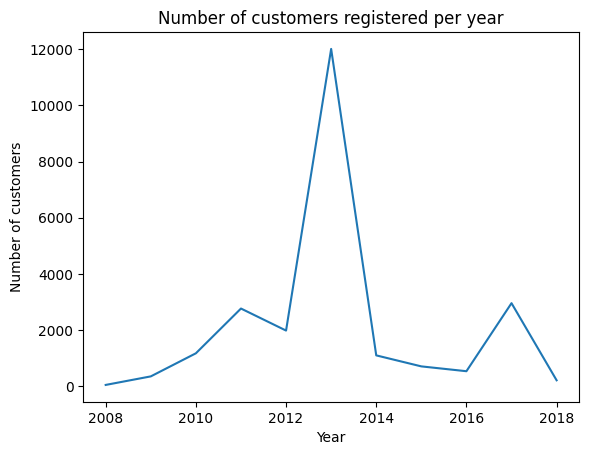

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'DateOfRegistration' column to datetime format
train_data['DateOfRegistration'] = pd.to_datetime(train_data['DateOfRegistration'])

# Create a new column 'RegistrationYear' containing the year of registration
train_data['RegistrationYear'] = train_data['DateOfRegistration'].dt.year

# Group by 'RegistrationYear' and count the number of unique customers
customer_counts = train_data.groupby('RegistrationYear')['CustomerID'].nunique()

# Create a line plot of the customer counts
plt.plot(customer_counts.index, customer_counts.values)
plt.title('Number of customers registered per year')
plt.xlabel('Year')
plt.ylabel('Number of customers')
plt.show()

## **Insights**

1. **Here no of customers registered per year is increased up to year 2013**
2. **After 2013 registered customers are decreasing which means in higher risk of customer churn**

**Now let us see per city wise that customers registered per year

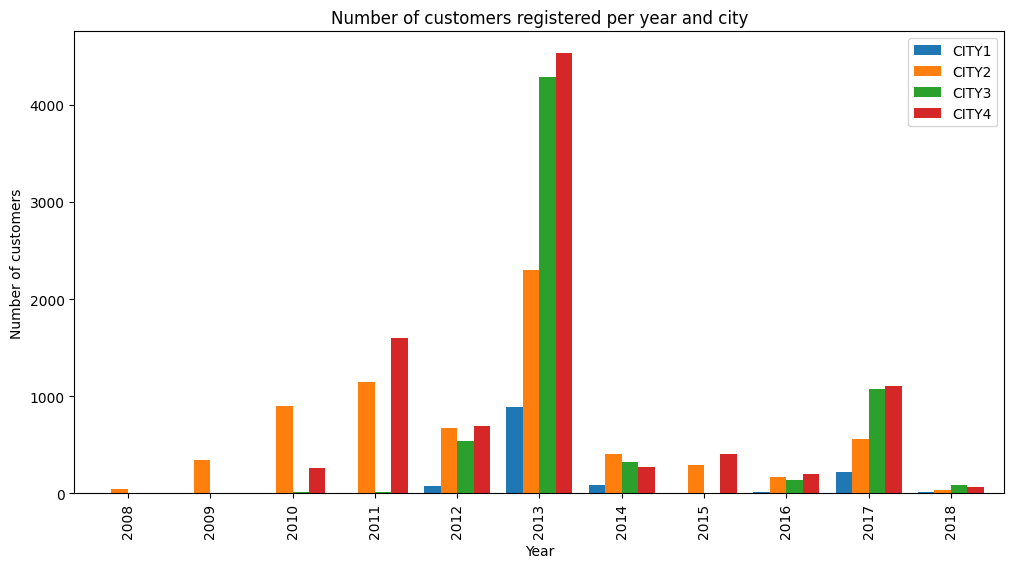

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'DateOfRegistration' column to datetime format
train_data['DateOfRegistration'] = pd.to_datetime(train_data['DateOfRegistration'])

# Create a new column 'RegistrationYear' containing the year of registration
train_data['RegistrationYear'] = train_data['DateOfRegistration'].dt.year

# Pivot the data to create a table of customer counts by city and year
customer_counts = train_data.pivot_table(values='CustomerID', index='RegistrationYear', columns='City', aggfunc=pd.Series.nunique)

# Create a bar chart
customer_counts.plot(kind='bar', width=0.8, figsize=(12, 6))

plt.title('Number of customers registered per year and city')
plt.xlabel('Year')
plt.ylabel('Number of customers')
plt.legend()
plt.show()


In [74]:
train_data.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'RetentionPotential', 'EmailType', 'num_emails', 'first_email_date',
       'last_email_date', 'DateOfemail', 'num_emails_opened',
       'num_emails_clicked', 'first_order_date', 'last_order_date',
       'total_order_quantity', 'RegistrationYear'],
      dtype='object')

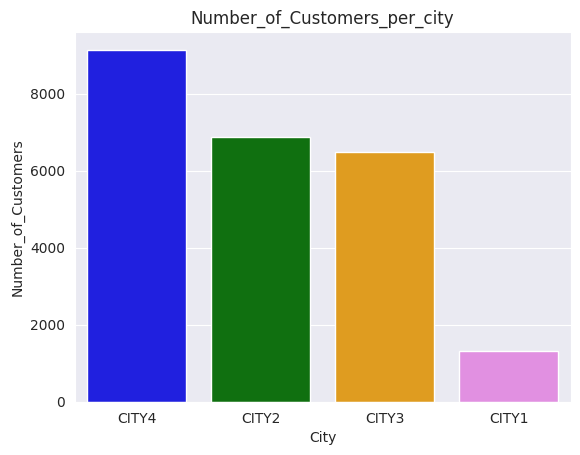

In [75]:
import seaborn as sns

sns.set_style('darkgrid')

city_counts = train_data['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Number_of_Customers']

ax = sns.barplot(x='City', y='Number_of_Customers', data=city_counts, palette=['blue', 'green', 'orange', 'violet'])
ax.set_title('Number_of_Customers_per_city')
ax.set_xlabel('City')
ax.set_ylabel('Number_of_Customers')

plt.show()


**Businesses could consider adjusting their delivery schedules to align with the preferred delivery days of customers in each city. This could help improve overall customer satisfaction and potentially increase customer loyalty.**

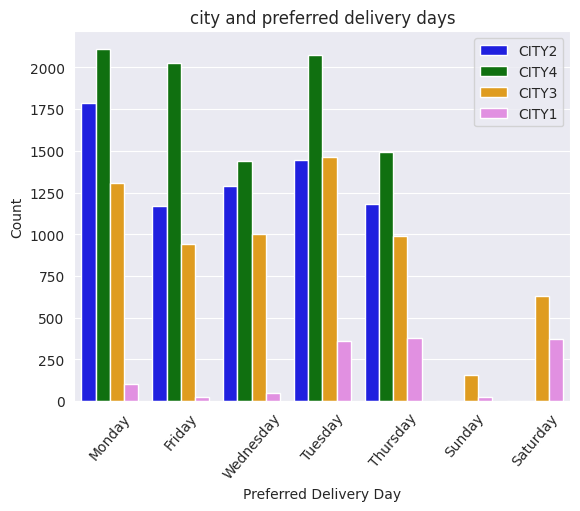

In [76]:
import seaborn as sns

sns.set_style('darkgrid')
ax = sns.countplot(x='PreferredDeliveryDay', data=train_data, hue='City', palette=['blue', 'green', 'orange', 'violet'])
ax.set_title('city and preferred delivery days')
ax.set_xlabel('Preferred Delivery Day')
ax.set_ylabel('Count')
ax.tick_params(axis='x', labelrotation=50)
ax.legend(loc='upper right')

plt.show()

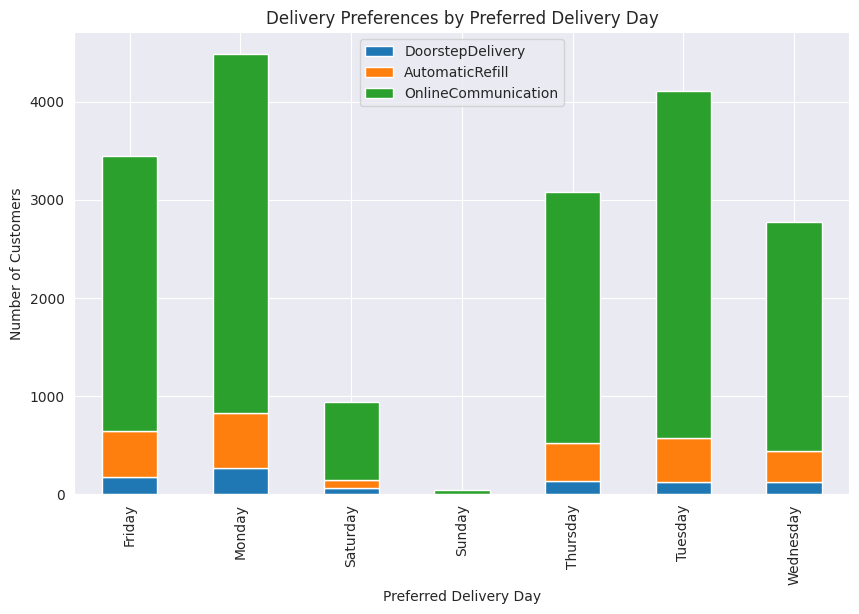

In [77]:
import matplotlib.pyplot as plt

delivery_prefs = train_data.groupby('PreferredDeliveryDay')['DoorstepDelivery', 'AutomaticRefill','OnlineCommunication'].sum()

delivery_prefs.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Delivery Preferences by Preferred Delivery Day')
plt.xlabel('Preferred Delivery Day')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

##**Insights**
1. **Frome above chart customers preferred more on online communication rather than on door step delivery.**
2. **Retailers can focus on improving their online communication channels such as email, chat, and social media to increase customer retention.**
3. **In the given data we have how the customers engaged with emails.**

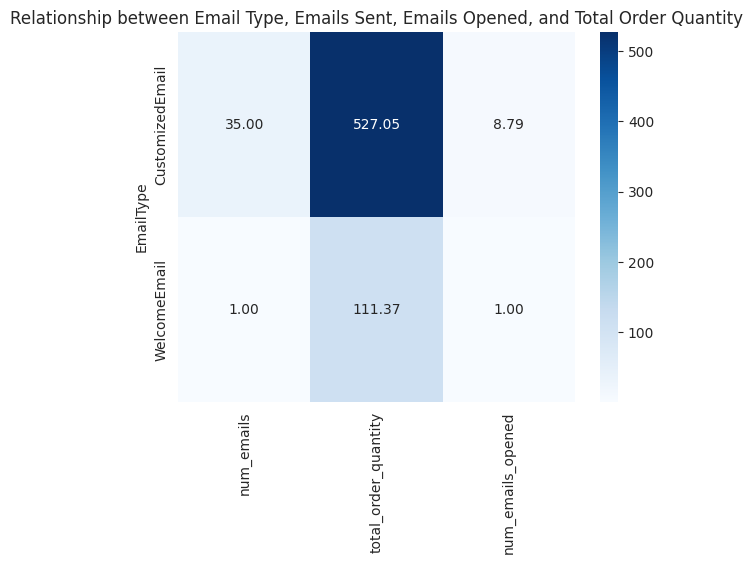

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by Email Type and calculate the mean of the relevant variables
email_data = train_data.groupby('EmailType').mean()[['num_emails', 'total_order_quantity', 'num_emails_opened']]

# Create a heatmap using the seaborn library to visualize the relationships between variables
sns.heatmap(email_data, annot=True, cmap='Blues', fmt='.2f')

# Set the title of the plot
plt.title('Relationship between Email Type, Emails Sent, Emails Opened, and Total Order Quantity')

# Show the plot
plt.show()


Counter({1: 15731, 0: 8089})


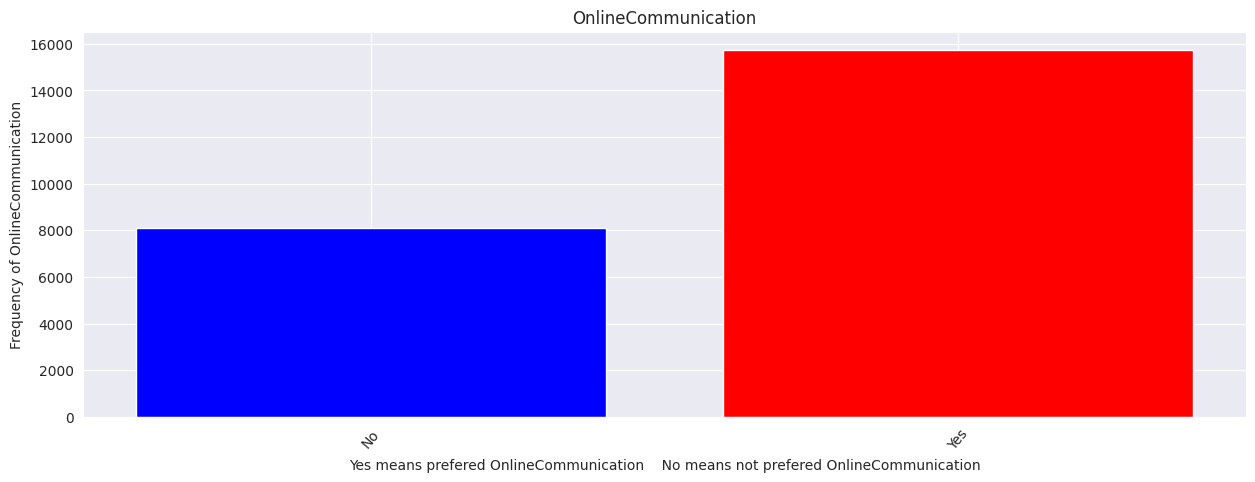

Counter({0: 21564, 1: 2256})


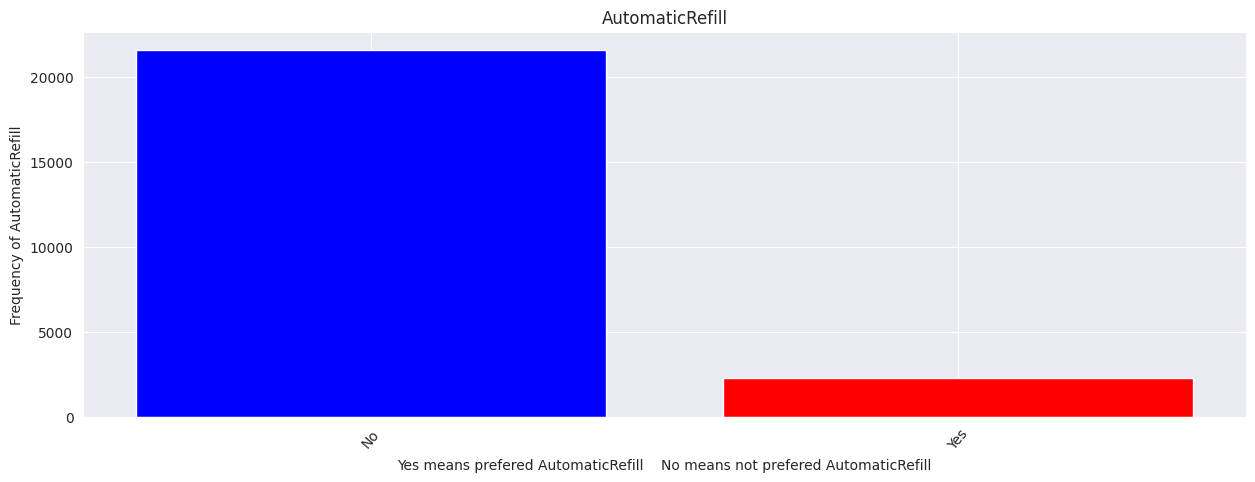

Counter({0: 22924, 1: 896})


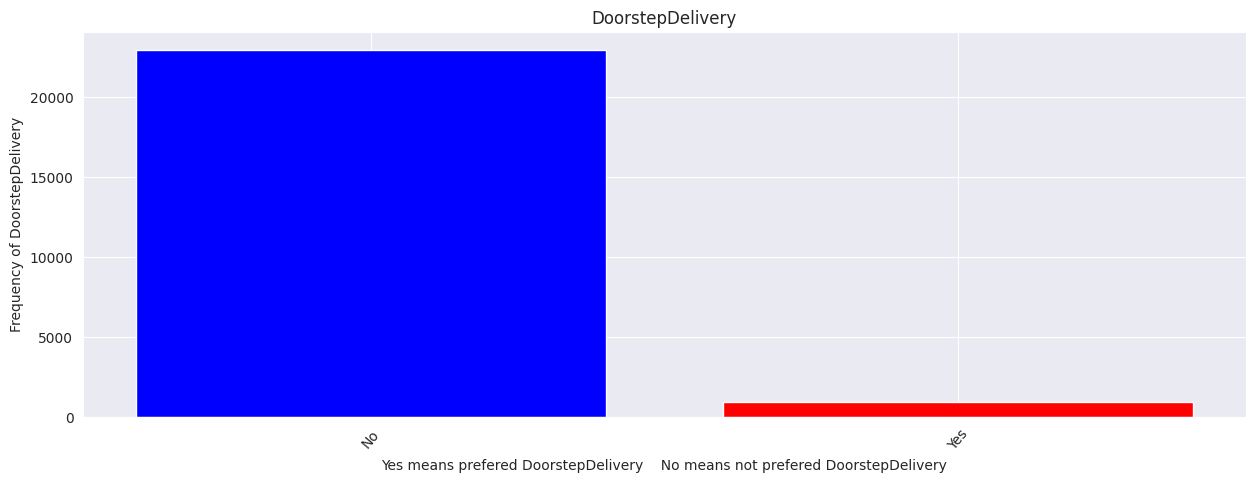

In [79]:
from collections import Counter
b=['No','Yes']
elements=['OnlineCommunication','AutomaticRefill','DoorstepDelivery']
for i in elements:
    a = Counter(train_data[i])
    print(a)
    plt.figure(figsize=(15,5))
    plt.xticks(fontsize=10, rotation=50)
    plt.title(i)
    ax.set_ylabel('Number of frequencies')
    plt.xlabel('Yes means prefered '+i+'    No means not prefered '+i)
    plt.ylabel('Frequency of '+i)
    plt.bar(b,a.values(),color=['blue', 'red'])
    ax.set_ylabel('Number of frequencies')
    plt.show()

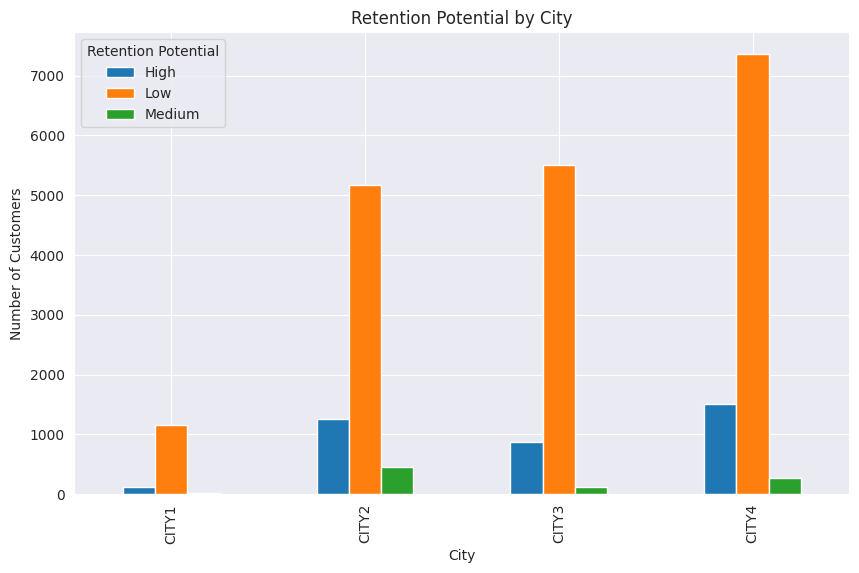

In [80]:
city_retention = train_data.groupby(['City', 'RetentionPotential'])['CustomerID'].count().unstack()

city_retention.plot(kind='bar', figsize=(10,6))
plt.title('Retention Potential by City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.legend(title='Retention Potential')
plt.show()


**This chart can provide insights on which cities have a high or low customer retention potential. By analyzing the chart, retail companies can focus their efforts on increasing customer retention in the cities with low retention potential, while maintaining the high retention potential cities. The different colors in the chart help distinguish between the different retention potential levels.**



 ## **Insights**
 1. **So, By observing above chart city2,city3,city4 has low potential level**

## Yearly Orders Quantity

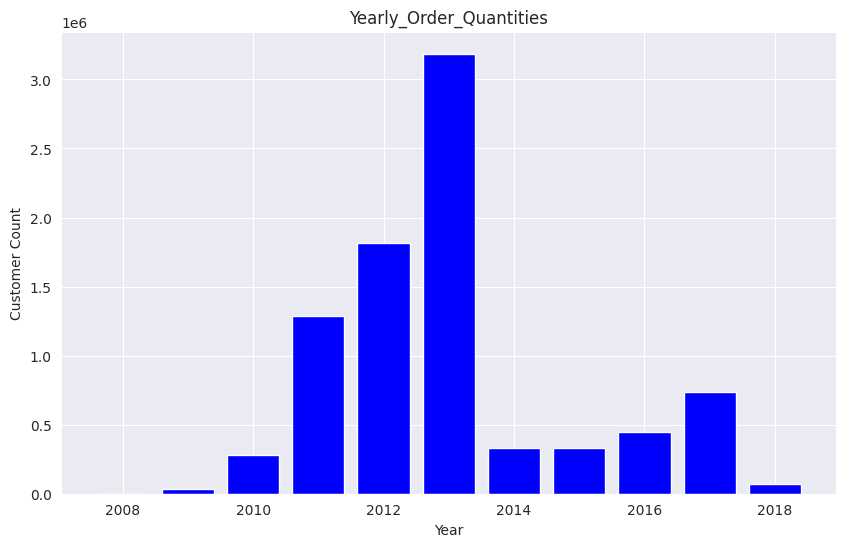

Year with the highest order quantities: 2013
Year with the lowest order quantities: 2008


In [81]:
# convert 'DateOfOrder' column to datetime
transac_train['DateOfOrder'] = pd.to_datetime(transac_train['DateOfOrder'])

# group transactions by year and sum the order quantities
yearly = transac_train.groupby(transac_train['DateOfOrder'].dt.year)['OrderQuantity'].sum()

max_year = yearly.idxmax()
min_year = yearly.idxmin()

# plot the data
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(yearly.index, yearly.values, color='blue')

# set the title and axis labels
ax.set_title('Yearly_Order_Quantities')
ax.set_xlabel('Year')
ax.set_ylabel('Customer Count')

# show the plot
plt.show()

print("Year with the highest order quantities:", max_year)
print("Year with the lowest order quantities:", min_year)

## **Insights**
1. **By observing above chart we can say that the retail business experienced a peak in sales in 2013, with lower sales in 2008 and the retail business seems to be low after 2013 which means in higher risk of Customer Churn**

##Monthly Order Quantities

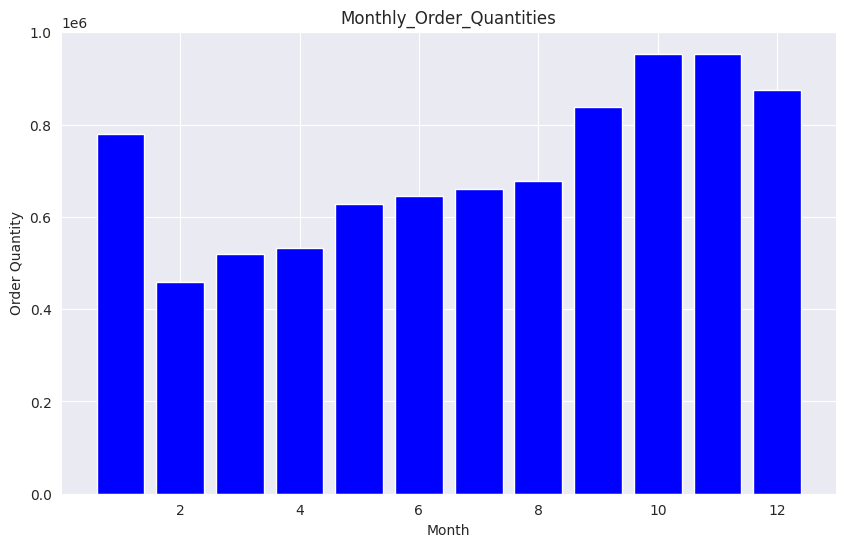

Month with the highest order quantities: 11
Month with the lowest order quantities: 2


In [82]:
import matplotlib.pyplot as plt

# Convert 'DateOfOrder' column to datetime
transac_train['DateOfOrder'] = pd.to_datetime(transac_train['DateOfOrder'])

# Create a new column for month
transac_train['Month'] = transac_train['DateOfOrder'].dt.month

# Group transactions by month and sum the order quantities
monthly_orders = transac_train.groupby(['Month'])['OrderQuantity'].sum()

max_month = monthly_orders.idxmax()
min_month = monthly_orders.idxmin()

# Plot the data
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(monthly_orders.index, monthly_orders.values, color='blue')

# Set the title and axis labels
ax.set_title('Monthly_Order_Quantities')
ax.set_xlabel('Month')
ax.set_ylabel('Order Quantity')

# Show the plot
plt.show()

print("Month with the highest order quantities:", max_month)
print("Month with the lowest order quantities:", min_month)

## **Insights**
**By observing above chart we can say that the retail business experienced a peak in sales in 11 month, with lower sales in 2 month.**

In [83]:
Dates=['last_order_date','DateOfRegistration']

for i in Dates:
    train_data[i]=pd.to_datetime(train_data[i], format='%Y-%m-%d')
    train_data[i+'year']=pd.DatetimeIndex(train_data[i]).year
    train_data[i+'month']=pd.DatetimeIndex(train_data[i]).month
    train_data[i+'day']=pd.DatetimeIndex(train_data[i]).day
train_data.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'RetentionPotential', 'EmailType', 'num_emails', 'first_email_date',
       'last_email_date', 'DateOfemail', 'num_emails_opened',
       'num_emails_clicked', 'first_order_date', 'last_order_date',
       'total_order_quantity', 'RegistrationYear', 'last_order_dateyear',
       'last_order_datemonth', 'last_order_dateday', 'DateOfRegistrationyear',
       'DateOfRegistrationmonth', 'DateOfRegistrationday'],
      dtype='object')

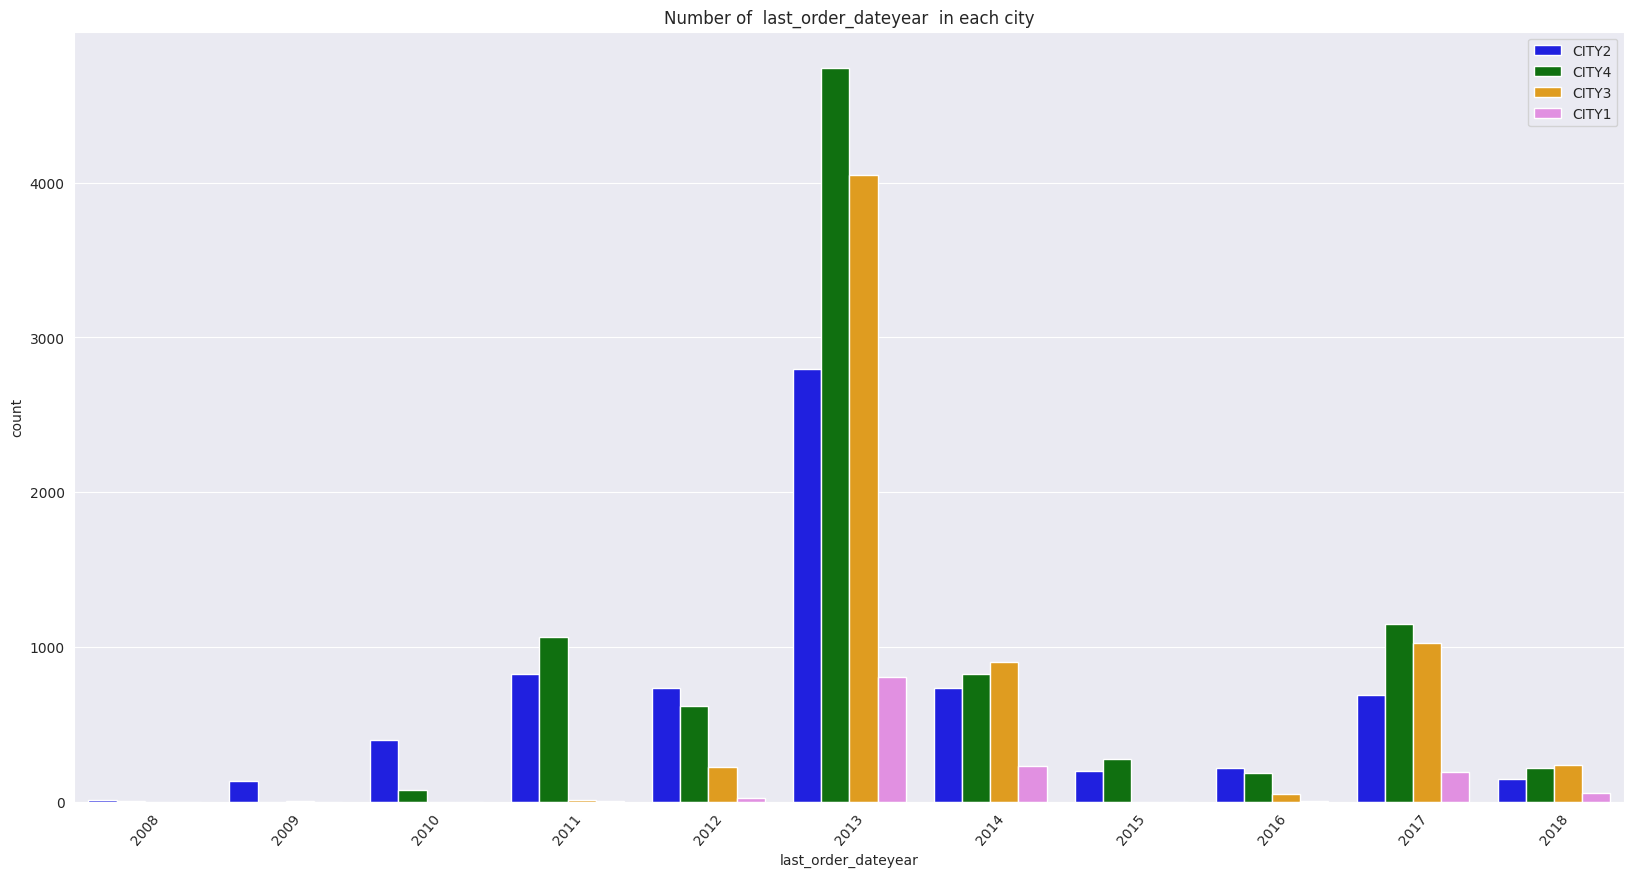

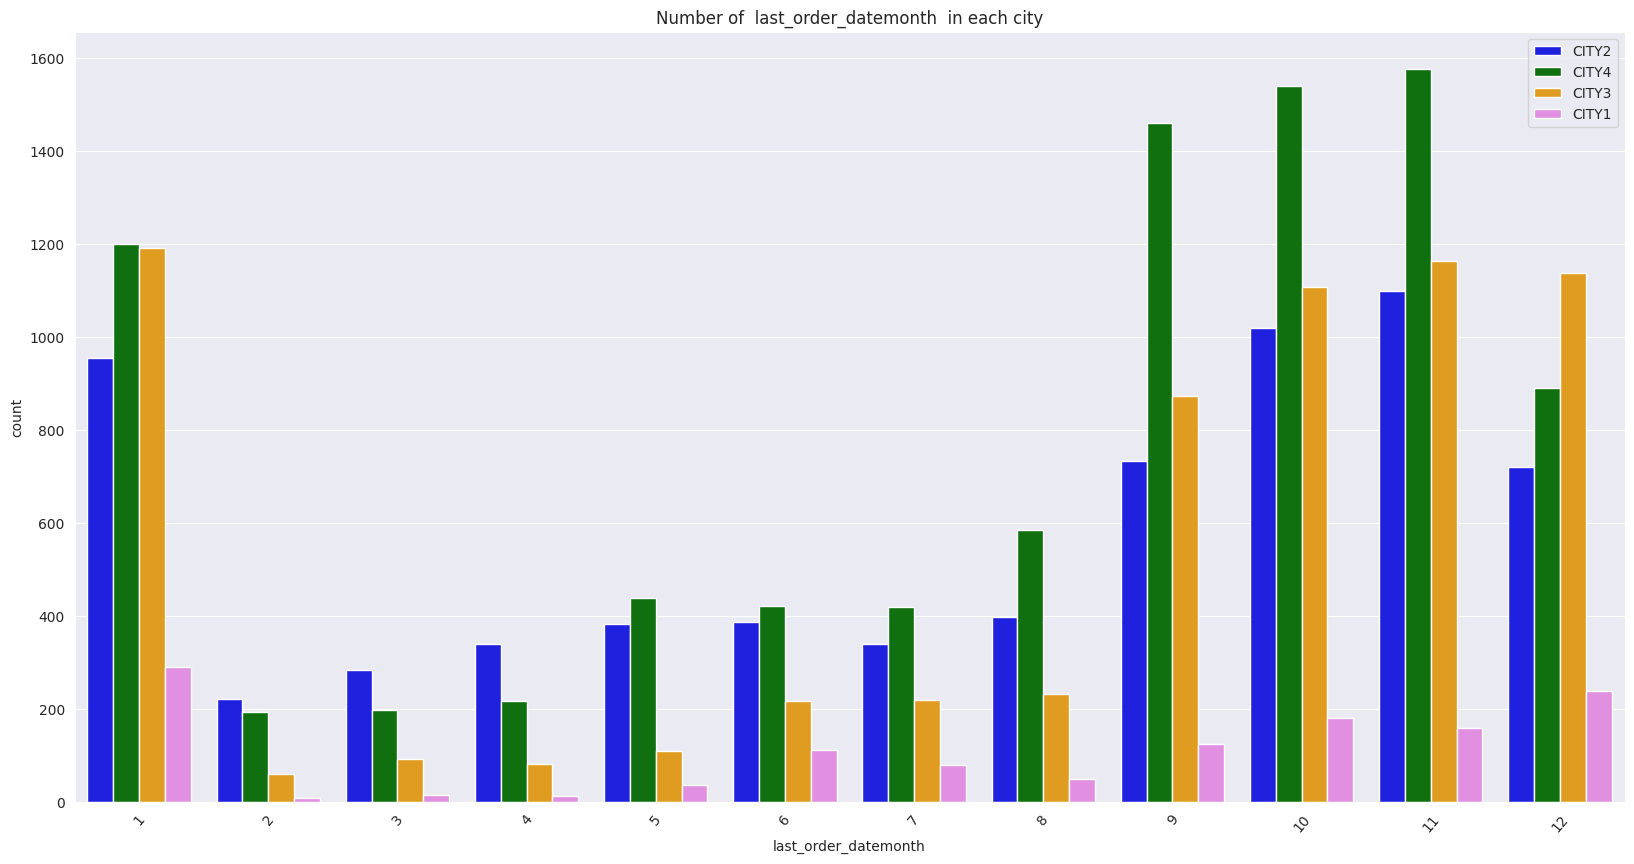

In [84]:
import seaborn as sns
att=['last_order_dateyear','last_order_datemonth']
for i in att:
    plt.figure(figsize=(20,10))
    plt.xticks(fontsize=10, rotation=50)
    plt.title('Number of  '+i+"  in each city")
    sns.countplot(x =i , data=train_data, hue='City', palette=['blue','green','orange','violet'])
    plt.legend(loc='upper right')

In [85]:
train_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,EmailType,num_emails,...,first_order_date,last_order_date,total_order_quantity,RegistrationYear,last_order_dateyear,last_order_datemonth,last_order_dateday,DateOfRegistrationyear,DateOfRegistrationmonth,DateOfRegistrationday
0,C16368,CITY2,2012-09-28,0,0,0,Monday,High,CustomizedEmail,29,...,2013-08-11,2013-08-11,15,2012,2013,8,11,2012,9,28
1,C20345,CITY2,2010-12-19,1,1,1,Friday,Low,CustomizedEmail,95,...,2011-04-01,2014-01-19,15614,2010,2014,1,19,2010,12,19
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,Medium,WelcomeEmail,1,...,2010-12-01,2011-07-06,443,2010,2011,7,6,2010,10,3
3,C18647,CITY4,2010-11-27,0,0,0,Monday,Low,CustomizedEmail,30,...,2010-11-29,2013-01-28,748,2010,2013,1,28,2010,11,27
4,C36692,CITY2,2009-12-04,1,1,0,Friday,Low,CustomizedEmail,64,...,2011-09-21,2014-01-16,2350,2009,2014,1,16,2009,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday,Low,WelcomeEmail,1,...,2018-01-17,2018-01-17,41,2018,2018,1,17,2018,1,17
23816,C12197,CITY3,2018-01-17,1,0,1,Friday,Low,WelcomeEmail,1,...,2018-01-17,2018-01-17,56,2018,2018,1,17,2018,1,17
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday,Low,WelcomeEmail,1,...,2018-01-17,2018-01-17,35,2018,2018,1,17,2018,1,17
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday,Low,CustomizedEmail,8,...,2018-01-17,2018-01-21,100,2018,2018,1,21,2018,1,17


In [86]:
train_data.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'RetentionPotential', 'EmailType', 'num_emails', 'first_email_date',
       'last_email_date', 'DateOfemail', 'num_emails_opened',
       'num_emails_clicked', 'first_order_date', 'last_order_date',
       'total_order_quantity', 'RegistrationYear', 'last_order_dateyear',
       'last_order_datemonth', 'last_order_dateday', 'DateOfRegistrationyear',
       'DateOfRegistrationmonth', 'DateOfRegistrationday'],
      dtype='object')

In [87]:
categorical = ['EmailType','City','OnlineCommunication','AutomaticRefill','DoorstepDelivery','PreferredDeliveryDay','RetentionPotential']
train_data[categorical] =train_data[categorical].astype('category')
train_data[categorical].dtypes

EmailType               category
City                    category
OnlineCommunication     category
AutomaticRefill         category
DoorstepDelivery        category
PreferredDeliveryDay    category
RetentionPotential      category
dtype: object

In [88]:
train_data.dtypes

CustomerID                         object
City                             category
DateOfRegistration         datetime64[ns]
OnlineCommunication              category
AutomaticRefill                  category
DoorstepDelivery                 category
PreferredDeliveryDay             category
RetentionPotential               category
EmailType                        category
num_emails                          int64
first_email_date           datetime64[ns]
last_email_date            datetime64[ns]
DateOfemail                datetime64[ns]
num_emails_opened                   int64
num_emails_clicked                  int64
first_order_date           datetime64[ns]
last_order_date            datetime64[ns]
total_order_quantity                int64
RegistrationYear                    int64
last_order_dateyear                 int64
last_order_datemonth                int64
last_order_dateday                  int64
DateOfRegistrationyear              int64
DateOfRegistrationmonth           

#7.Feature Engineering

In [89]:
# Calculate the average order quantity
orders_df = transac_train.groupby('CustomerID')['OrderQuantity'].agg(['sum', 'count']).reset_index()
orders_df['avg_order_quantity'] = orders_df['sum'] / orders_df['count']


In [90]:
train_data['avg_order_quantity'] = orders_df['avg_order_quantity']

## **Insights**

**This could potentially be useful in predicting retail customer retention potential level as customers who have a higher average order quantity may be more likely to return and make additional purchases in the future.**

In [91]:
import pandas as pd


# Convert the date columns to datetime format
train_data['DateOfRegistration'] = pd.to_datetime(train_data['DateOfRegistration'])
train_data['first_order_date'] = pd.to_datetime(train_data['first_order_date'])

# Calculate the time difference in days
train_data['time_between_registration_and_first_order'] = (train_data['first_order_date'] - train_data['DateOfRegistration']).dt.days


In [92]:
train_data['time_between_first_last_order'] = (train_data['last_order_date'] - train_data['first_order_date']).dt.days

In [93]:
train_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,EmailType,num_emails,...,RegistrationYear,last_order_dateyear,last_order_datemonth,last_order_dateday,DateOfRegistrationyear,DateOfRegistrationmonth,DateOfRegistrationday,avg_order_quantity,time_between_registration_and_first_order,time_between_first_last_order
0,C16368,CITY2,2012-09-28,0,0,0,Monday,High,CustomizedEmail,29,...,2012,2013,8,11,2012,9,28,38.333333,317,0
1,C20345,CITY2,2010-12-19,1,1,1,Friday,Low,CustomizedEmail,95,...,2010,2014,1,19,2010,12,19,41.000000,103,1024
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,Medium,WelcomeEmail,1,...,2010,2011,7,6,2010,10,3,41.000000,59,217
3,C18647,CITY4,2010-11-27,0,0,0,Monday,Low,CustomizedEmail,30,...,2010,2013,1,28,2010,11,27,52.000000,2,791
4,C36692,CITY2,2009-12-04,1,1,0,Friday,Low,CustomizedEmail,64,...,2009,2014,1,16,2009,12,4,31.000000,656,848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday,Low,WelcomeEmail,1,...,2018,2018,1,17,2018,1,17,103.076923,0,0
23816,C12197,CITY3,2018-01-17,1,0,1,Friday,Low,WelcomeEmail,1,...,2018,2018,1,17,2018,1,17,46.000000,0,0
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday,Low,WelcomeEmail,1,...,2018,2018,1,17,2018,1,17,41.000000,0,0
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday,Low,CustomizedEmail,8,...,2018,2018,1,21,2018,1,17,51.000000,0,4


In [94]:
orders_df

,CustomerID,sum,count,avg_order_quantity
0,C12116,115,3,38.333333
1,C12117,41,1,41.000000
2,C12118,41,1,41.000000
3,C12119,52,1,52.000000
4,C12120,31,1,31.000000
...,...,...,...,...
23815,C42185,1340,13,103.076923
23816,C42186,46,1,46.000000
23817,C42187,41,1,41.000000
23818,C42188,51,1,51.000000


**Recency: Calculate the number of days since the customer's last order. This can be a powerful predictor of retention, as customers who have recently made a purchase are more likely to return in the near future.**

In [95]:
import pandas as pd

# group the orders by `customer_id` and find the maximum `order_date` for each group
last_order_dates = transac_train.groupby('CustomerID')['DateOfOrder'].max()


# find the last order date across all customers
last_order_date_all = last_order_dates.max()

# define the customer_id of interest
customer_id = train_data['CustomerID']

# find the last order date of the customer of interest
last_order_date_customer = last_order_dates.loc[customer_id]

# calculate the number of days between the most recent order date of the customer of interest and the most recent order date across all customers
recency_customer = (last_order_date_all - last_order_date_customer).dt.days

In [96]:
last_order_date_all

Timestamp('2018-01-21 00:00:00')

In [97]:
recency_customer

CustomerID
C16368    1624
C20345    1463
C17683    2391
C18647    1819
C36692    1466
          ... 
C23511       4
C12197       4
C40967       4
C36140       0
C42003       4
Name: DateOfOrder, Length: 23820, dtype: int64

In [98]:
# add a new column 'recencyz_customer' to the train_data dataframe
train_data['recency_customer'] = recency_customer.values

In [99]:
train_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,EmailType,num_emails,...,last_order_dateyear,last_order_datemonth,last_order_dateday,DateOfRegistrationyear,DateOfRegistrationmonth,DateOfRegistrationday,avg_order_quantity,time_between_registration_and_first_order,time_between_first_last_order,recency_customer
0,C16368,CITY2,2012-09-28,0,0,0,Monday,High,CustomizedEmail,29,...,2013,8,11,2012,9,28,38.333333,317,0,1624
1,C20345,CITY2,2010-12-19,1,1,1,Friday,Low,CustomizedEmail,95,...,2014,1,19,2010,12,19,41.000000,103,1024,1463
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,Medium,WelcomeEmail,1,...,2011,7,6,2010,10,3,41.000000,59,217,2391
3,C18647,CITY4,2010-11-27,0,0,0,Monday,Low,CustomizedEmail,30,...,2013,1,28,2010,11,27,52.000000,2,791,1819
4,C36692,CITY2,2009-12-04,1,1,0,Friday,Low,CustomizedEmail,64,...,2014,1,16,2009,12,4,31.000000,656,848,1466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday,Low,WelcomeEmail,1,...,2018,1,17,2018,1,17,103.076923,0,0,4
23816,C12197,CITY3,2018-01-17,1,0,1,Friday,Low,WelcomeEmail,1,...,2018,1,17,2018,1,17,46.000000,0,0,4
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday,Low,WelcomeEmail,1,...,2018,1,17,2018,1,17,41.000000,0,0,4
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday,Low,CustomizedEmail,8,...,2018,1,21,2018,1,17,51.000000,0,4,0


In [100]:
train_data.dtypes

CustomerID                                           object
City                                               category
DateOfRegistration                           datetime64[ns]
OnlineCommunication                                category
AutomaticRefill                                    category
DoorstepDelivery                                   category
PreferredDeliveryDay                               category
RetentionPotential                                 category
EmailType                                          category
num_emails                                            int64
first_email_date                             datetime64[ns]
last_email_date                              datetime64[ns]
DateOfemail                                  datetime64[ns]
num_emails_opened                                     int64
num_emails_clicked                                    int64
first_order_date                             datetime64[ns]
last_order_date                         

**By calculating the time elapsed between the first and last email sent to the customer, the email_time_elapse feature can provide insights into customer engagement with the business. A longer time elapsed between the first and last email sent may suggest a lack of interest or engagement from the customer, while a shorter time elapsed may suggest a higher level of engagement.**

**Similarly, by calculating the time elapsed between the customer's first and last order, the order_time_elapse feature can provide insights into the customer's purchase behavior. A longer time elapsed between the first and last order may suggest a decreasing interest in the business, while a shorter time elapsed may suggest a higher level of customer loyalty.**

In [101]:
#Calculate the time elapsed in days between two datetime columns
train_data['email_time_elapse'] = (train_data['last_email_date'] - train_data['first_email_date']).dt.days
train_data['order_time_elapse'] = (train_data['last_order_date'] - train_data['first_order_date']).dt.days

In [102]:
train_data.dtypes

CustomerID                                           object
City                                               category
DateOfRegistration                           datetime64[ns]
OnlineCommunication                                category
AutomaticRefill                                    category
DoorstepDelivery                                   category
PreferredDeliveryDay                               category
RetentionPotential                                 category
EmailType                                          category
num_emails                                            int64
first_email_date                             datetime64[ns]
last_email_date                              datetime64[ns]
DateOfemail                                  datetime64[ns]
num_emails_opened                                     int64
num_emails_clicked                                    int64
first_order_date                             datetime64[ns]
last_order_date                         

In [103]:
# Dropping of unwanted columns
train_data.drop(['CustomerID','last_email_date','last_order_dateyear','last_order_datemonth','first_email_date','first_order_date','last_order_date','DateOfemail','DateOfRegistration','RegistrationYear','last_order_dateday','DateOfRegistrationday'],axis=1,inplace=True)

In [104]:
train_data.dtypes

City                                         category
OnlineCommunication                          category
AutomaticRefill                              category
DoorstepDelivery                             category
PreferredDeliveryDay                         category
RetentionPotential                           category
EmailType                                    category
num_emails                                      int64
num_emails_opened                               int64
num_emails_clicked                              int64
total_order_quantity                            int64
DateOfRegistrationyear                          int64
DateOfRegistrationmonth                         int64
avg_order_quantity                            float64
time_between_registration_and_first_order       int64
time_between_first_last_order                   int64
recency_customer                                int64
email_time_elapse                               int64
order_time_elapse           

In [105]:
train_data

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,EmailType,num_emails,num_emails_opened,num_emails_clicked,total_order_quantity,DateOfRegistrationyear,DateOfRegistrationmonth,avg_order_quantity,time_between_registration_and_first_order,time_between_first_last_order,recency_customer,email_time_elapse,order_time_elapse
0,CITY2,0,0,0,Monday,High,CustomizedEmail,29,29,1,15,2012,9,38.333333,317,0,1624,291,0
1,CITY2,1,1,1,Friday,Low,CustomizedEmail,95,88,10,15614,2010,12,41.000000,103,1024,1463,1094,1024
2,CITY2,0,0,0,Wednesday,Medium,WelcomeEmail,1,1,0,443,2010,10,41.000000,59,217,2391,0,217
3,CITY4,0,0,0,Monday,Low,CustomizedEmail,30,27,4,748,2010,11,52.000000,2,791,1819,676,791
4,CITY2,1,1,0,Friday,Low,CustomizedEmail,64,18,10,2350,2009,12,31.000000,656,848,1466,1484,848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,CITY2,1,1,0,Friday,Low,WelcomeEmail,1,1,0,41,2018,1,103.076923,0,0,4,0,0
23816,CITY3,1,0,1,Friday,Low,WelcomeEmail,1,1,0,56,2018,1,46.000000,0,0,4,0,0
23817,CITY3,1,0,0,Saturday,Low,WelcomeEmail,1,1,0,35,2018,1,41.000000,0,0,4,0,0
23818,CITY3,1,1,0,Saturday,Low,CustomizedEmail,8,6,3,100,2018,1,51.000000,0,4,0,3,4


In [106]:
# Divding numerical and categorical features
numerical_features=[]
categorical_features=[]
for i in train_data.columns:
  if train_data[i].dtypes =='category':
    categorical_features.append(i)
  else:
    numerical_features.append(i)

In [107]:
numerical_features

['num_emails',
 'num_emails_opened',
 'num_emails_clicked',
 'total_order_quantity',
 'DateOfRegistrationyear',
 'DateOfRegistrationmonth',
 'avg_order_quantity',
 'time_between_registration_and_first_order',
 'time_between_first_last_order',
 'recency_customer',
 'email_time_elapse',
 'order_time_elapse']

In [108]:
categorical_features

['City',
 'OnlineCommunication',
 'AutomaticRefill',
 'DoorstepDelivery',
 'PreferredDeliveryDay',
 'RetentionPotential',
 'EmailType']

In [109]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Perform label encoding on the 'RetentionPotential' column
le = LabelEncoder()
train_data['RetentionPotential'] = le.fit_transform(train_data['RetentionPotential'])

In [110]:
df_encoded = pd.get_dummies(train_data[categorical_features], columns=['OnlineCommunication','AutomaticRefill','DoorstepDelivery','City', 'PreferredDeliveryDay', 'EmailType'])

In [111]:
df_encoded

,RetentionPotential,OnlineCommunication_0,OnlineCommunication_1,AutomaticRefill_0,AutomaticRefill_1,DoorstepDelivery_0,DoorstepDelivery_1,City_CITY1,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,EmailType_CustomizedEmail,EmailType_WelcomeEmail
0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,2,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
23816,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
23817,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
23818,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [112]:
df_encoded.drop(['OnlineCommunication_1','AutomaticRefill_1','DoorstepDelivery_1','EmailType_CustomizedEmail'],axis=1,inplace=True)

In [113]:
df_encoded = df_encoded.reset_index()

In [114]:
df_encoded.drop('index',axis=1,inplace=True)

In [115]:
df_encoded.dtypes

RetentionPotential                int64
OnlineCommunication_0             uint8
AutomaticRefill_0                 uint8
DoorstepDelivery_0                uint8
City_CITY1                        uint8
City_CITY2                        uint8
City_CITY3                        uint8
City_CITY4                        uint8
PreferredDeliveryDay_Friday       uint8
PreferredDeliveryDay_Monday       uint8
PreferredDeliveryDay_Saturday     uint8
PreferredDeliveryDay_Sunday       uint8
PreferredDeliveryDay_Thursday     uint8
PreferredDeliveryDay_Tuesday      uint8
PreferredDeliveryDay_Wednesday    uint8
EmailType_WelcomeEmail            uint8
dtype: object

In [116]:
numerical_features

['num_emails',
 'num_emails_opened',
 'num_emails_clicked',
 'total_order_quantity',
 'DateOfRegistrationyear',
 'DateOfRegistrationmonth',
 'avg_order_quantity',
 'time_between_registration_and_first_order',
 'time_between_first_last_order',
 'recency_customer',
 'email_time_elapse',
 'order_time_elapse']

# Scaling

In [117]:
from sklearn.preprocessing import MinMaxScaler


# Apply MinMaxScaler to selected features
scaler = MinMaxScaler()
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])


In [118]:
train_data[numerical_features].reset_index()

,index,num_emails,num_emails_opened,num_emails_clicked,total_order_quantity,DateOfRegistrationyear,DateOfRegistrationmonth,avg_order_quantity,time_between_registration_and_first_order,time_between_first_last_order,recency_customer,email_time_elapse,order_time_elapse
0,0,0.096552,0.113725,0.023810,0.000292,0.4,0.727273,0.025539,0.158659,0.000000,0.468958,0.148242,0.000000
1,1,0.324138,0.345098,0.238095,0.303603,0.2,1.000000,0.027315,0.051552,0.515869,0.422466,0.557310,0.515869
2,2,0.000000,0.003922,0.000000,0.008614,0.2,0.818182,0.027315,0.029530,0.109320,0.690442,0.000000,0.109320
3,3,0.100000,0.105882,0.095238,0.014544,0.2,0.909091,0.034644,0.001001,0.398489,0.525267,0.344371,0.398489
4,4,0.217241,0.070588,0.238095,0.045694,0.1,1.000000,0.020653,0.328328,0.427204,0.423332,0.755986,0.427204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,23815,0.000000,0.003922,0.000000,0.000797,1.0,0.000000,0.068672,0.000000,0.000000,0.001155,0.000000,0.000000
23816,23816,0.000000,0.003922,0.000000,0.001089,1.0,0.000000,0.030646,0.000000,0.000000,0.001155,0.000000,0.000000
23817,23817,0.000000,0.003922,0.000000,0.000681,1.0,0.000000,0.027315,0.000000,0.000000,0.001155,0.000000,0.000000
23818,23818,0.024138,0.023529,0.071429,0.001944,1.0,0.000000,0.033977,0.000000,0.002015,0.000000,0.001528,0.002015


In [119]:
train_data[numerical_features]

,num_emails,num_emails_opened,num_emails_clicked,total_order_quantity,DateOfRegistrationyear,DateOfRegistrationmonth,avg_order_quantity,time_between_registration_and_first_order,time_between_first_last_order,recency_customer,email_time_elapse,order_time_elapse
0,0.096552,0.113725,0.023810,0.000292,0.4,0.727273,0.025539,0.158659,0.000000,0.468958,0.148242,0.000000
1,0.324138,0.345098,0.238095,0.303603,0.2,1.000000,0.027315,0.051552,0.515869,0.422466,0.557310,0.515869
2,0.000000,0.003922,0.000000,0.008614,0.2,0.818182,0.027315,0.029530,0.109320,0.690442,0.000000,0.109320
3,0.100000,0.105882,0.095238,0.014544,0.2,0.909091,0.034644,0.001001,0.398489,0.525267,0.344371,0.398489
4,0.217241,0.070588,0.238095,0.045694,0.1,1.000000,0.020653,0.328328,0.427204,0.423332,0.755986,0.427204
...,...,...,...,...,...,...,...,...,...,...,...,...
23815,0.000000,0.003922,0.000000,0.000797,1.0,0.000000,0.068672,0.000000,0.000000,0.001155,0.000000,0.000000
23816,0.000000,0.003922,0.000000,0.001089,1.0,0.000000,0.030646,0.000000,0.000000,0.001155,0.000000,0.000000
23817,0.000000,0.003922,0.000000,0.000681,1.0,0.000000,0.027315,0.000000,0.000000,0.001155,0.000000,0.000000
23818,0.024138,0.023529,0.071429,0.001944,1.0,0.000000,0.033977,0.000000,0.002015,0.000000,0.001528,0.002015


In [120]:
encoded_df = pd.concat([df_encoded, train_data[numerical_features]], axis=1)

In [121]:
encoded_df

,RetentionPotential,OnlineCommunication_0,AutomaticRefill_0,DoorstepDelivery_0,City_CITY1,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,...,num_emails_clicked,total_order_quantity,DateOfRegistrationyear,DateOfRegistrationmonth,avg_order_quantity,time_between_registration_and_first_order,time_between_first_last_order,recency_customer,email_time_elapse,order_time_elapse
0,0,1,1,1,0,1,0,0,0,1,...,0.023810,0.000292,0.4,0.727273,0.025539,0.158659,0.000000,0.468958,0.148242,0.000000
1,1,0,0,0,0,1,0,0,1,0,...,0.238095,0.303603,0.2,1.000000,0.027315,0.051552,0.515869,0.422466,0.557310,0.515869
2,2,1,1,1,0,1,0,0,0,0,...,0.000000,0.008614,0.2,0.818182,0.027315,0.029530,0.109320,0.690442,0.000000,0.109320
3,1,1,1,1,0,0,0,1,0,1,...,0.095238,0.014544,0.2,0.909091,0.034644,0.001001,0.398489,0.525267,0.344371,0.398489
4,1,0,0,1,0,1,0,0,1,0,...,0.238095,0.045694,0.1,1.000000,0.020653,0.328328,0.427204,0.423332,0.755986,0.427204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,1,0,0,1,0,1,0,0,1,0,...,0.000000,0.000797,1.0,0.000000,0.068672,0.000000,0.000000,0.001155,0.000000,0.000000
23816,1,0,1,0,0,0,1,0,1,0,...,0.000000,0.001089,1.0,0.000000,0.030646,0.000000,0.000000,0.001155,0.000000,0.000000
23817,1,0,1,1,0,0,1,0,0,0,...,0.000000,0.000681,1.0,0.000000,0.027315,0.000000,0.000000,0.001155,0.000000,0.000000
23818,1,0,0,1,0,0,1,0,0,0,...,0.071429,0.001944,1.0,0.000000,0.033977,0.000000,0.002015,0.000000,0.001528,0.002015


In [122]:
encoded_df.columns

Index(['RetentionPotential', 'OnlineCommunication_0', 'AutomaticRefill_0',
       'DoorstepDelivery_0', 'City_CITY1', 'City_CITY2', 'City_CITY3',
       'City_CITY4', 'PreferredDeliveryDay_Friday',
       'PreferredDeliveryDay_Monday', 'PreferredDeliveryDay_Saturday',
       'PreferredDeliveryDay_Sunday', 'PreferredDeliveryDay_Thursday',
       'PreferredDeliveryDay_Tuesday', 'PreferredDeliveryDay_Wednesday',
       'EmailType_WelcomeEmail', 'num_emails', 'num_emails_opened',
       'num_emails_clicked', 'total_order_quantity', 'DateOfRegistrationyear',
       'DateOfRegistrationmonth', 'avg_order_quantity',
       'time_between_registration_and_first_order',
       'time_between_first_last_order', 'recency_customer',
       'email_time_elapse', 'order_time_elapse'],
      dtype='object')

#8.Model Building with out Hyper Parameter Tuning

##Decision Tree Classifier

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the data into train and test sets
X = encoded_df.drop('RetentionPotential', axis=1) # features
y = encoded_df['RetentionPotential'] # target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Calculate evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1 score:', f1_score(y_test, y_pred, average='macro'))
print('Classification report:', classification_report(y_test, y_pred))

# Print evaluation metrics for the training set (optional)
y_trainpred = tree_model.predict(X_train)
print('Accuracy (training set):', accuracy_score(y_train, y_trainpred))
print('Classification report (training set):', classification_report(y_train, y_trainpred))

Accuracy: 0.8660789252728799
Precision: 0.7555475348644557
Recall: 0.7685402644879192
F1 score: 0.7618900220684198
Classification report:               precision    recall  f1-score   support

           0       0.61      0.64      0.62      1137
           1       0.93      0.92      0.92      5742
           2       0.73      0.75      0.74       267

    accuracy                           0.87      7146
   macro avg       0.76      0.77      0.76      7146
weighted avg       0.87      0.87      0.87      7146

Accuracy (training set): 0.9990404222142257
Classification report (training set):               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2619
           1       1.00      1.00      1.00     13443
           2       1.00      1.00      1.00       612

    accuracy                           1.00     16674
   macro avg       1.00      1.00      1.00     16674
weighted avg       1.00      1.00      1.00     16674



##**Insights**

The classification report shows the performance of the Decision Tree Classifier in predicting the customer retention potential level. The model achieved an overall accuracy of 0.87 on the test set, and 0.99 on the train test which means that the model is overfitting.

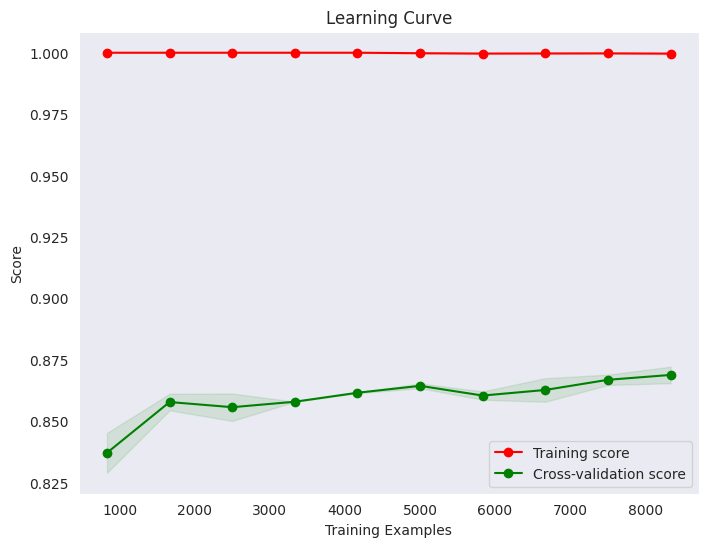

In [124]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier


# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    tree_model, X_train, y_train, cv=2, n_jobs=-1, train_sizes=train_sizes)

# Calculate the mean and standard deviation of the training and cross-validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

##Random Forest Classifier

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the data into train and test sets
X = encoded_df.drop('RetentionPotential', axis=1) # features
y = encoded_df['RetentionPotential'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set using the trained model
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1 score:', f1_score(y_test, y_pred, average='micro'))
print('Classification report:', classification_report(y_test, y_pred))

# Print evaluation metrics for the training set (optional)
y_trainpred = rf_model.predict(X_train)
print('Accuracy (training set):', accuracy_score(y_train, y_trainpred))
print('Classification report (training set):', classification_report(y_train, y_trainpred))

Accuracy: 0.8977050097956899
Precision: 0.8977050097956899
Recall: 0.8977050097956899
F1 score: 0.8977050097956899
Classification report:               precision    recall  f1-score   support

           0       0.76      0.60      0.67      1137
           1       0.92      0.97      0.94      5742
           2       0.89      0.69      0.78       267

    accuracy                           0.90      7146
   macro avg       0.85      0.75      0.80      7146
weighted avg       0.89      0.90      0.89      7146

Accuracy (training set): 0.9990404222142257
Classification report (training set):               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2619
           1       1.00      1.00      1.00     13443
           2       1.00      1.00      1.00       612

    accuracy                           1.00     16674
   macro avg       1.00      1.00      1.00     16674
weighted avg       1.00      1.00      1.00     16674



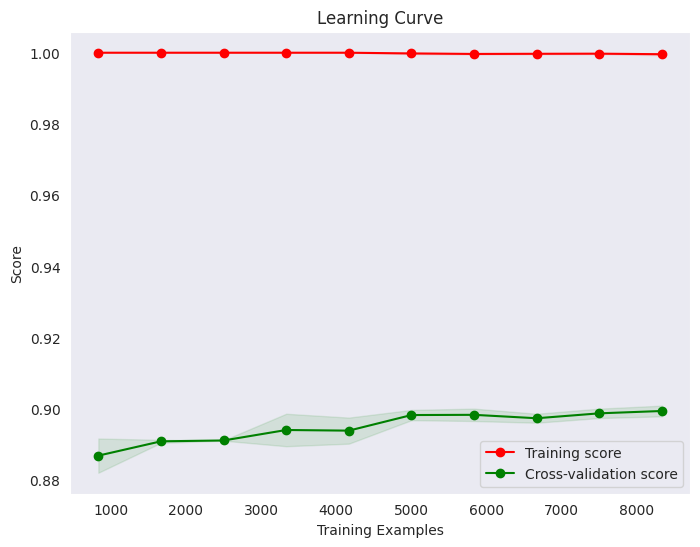

In [126]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier


# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=2, n_jobs=-1, train_sizes=train_sizes)

# Calculate the mean and standard deviation of the training and cross-validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

##K- Nearest Neighbour Classifier

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the data into train and test sets
X = encoded_df.drop('RetentionPotential', axis=1) # features
y = encoded_df['RetentionPotential'] # target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1 score:', f1_score(y_test, y_pred, average='micro'))
print('Classification report:', classification_report(y_test, y_pred))

# Print evaluation metrics for the training set (optional)
y_trainpred = knn_model.predict(X_train)
print('Accuracy (training set):', accuracy_score(y_train, y_trainpred))
print('Classification report (training set):', classification_report(y_train, y_trainpred))

Accuracy: 0.8466274839070809
Precision: 0.8466274839070809
Recall: 0.8466274839070809
F1 score: 0.8466274839070809
Classification report:               precision    recall  f1-score   support

           0       0.59      0.50      0.54      1137
           1       0.89      0.95      0.92      5742
           2       0.67      0.15      0.24       267

    accuracy                           0.85      7146
   macro avg       0.72      0.53      0.57      7146
weighted avg       0.83      0.85      0.83      7146

Accuracy (training set): 0.8846707448722562
Classification report (training set):               precision    recall  f1-score   support

           0       0.72      0.60      0.65      2619
           1       0.91      0.97      0.94     13443
           2       0.89      0.25      0.39       612

    accuracy                           0.88     16674
   macro avg       0.84      0.61      0.66     16674
weighted avg       0.88      0.88      0.87     16674



## **Insights**

Based on the classification report, it appears that the model is performing reasonably well on the training set with an accuracy of 0.88. However, on the test set, the model's accuracy drops to 0.85, which indicates that the model may be overfitting to the training set

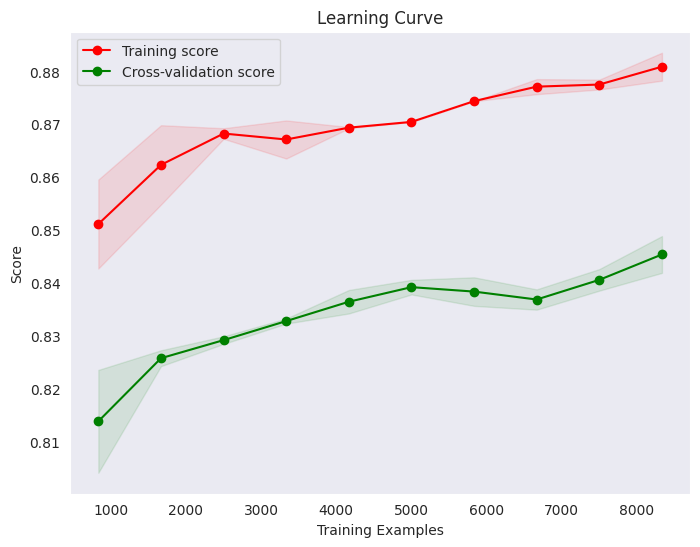

In [128]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier


# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    knn_model, X_train, y_train, cv=2, n_jobs=-1, train_sizes=train_sizes)

# Calculate the mean and standard deviation of the training and cross-validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

##XGBoost Classifier

In [129]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X = encoded_df.drop('RetentionPotential', axis=1) # features
y = encoded_df['RetentionPotential'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the XGBoost classifier model
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model on the training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics for the test set
print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1 score:', f1_score(y_test, y_pred, average='micro'))
print('Classification report:', classification_report(y_test, y_pred))

# Make predictions on the training set
y_trainpred = xgb_model.predict(X_train)

# Calculate evaluation metrics for the training set
print('\nTraining set metrics:')
print('Accuracy:', accuracy_score(y_train, y_trainpred))
print('Precision:', precision_score(y_train, y_trainpred, average='micro'))
print('Recall:', recall_score(y_train, y_trainpred, average='micro'))
print('F1 score:', f1_score(y_train, y_trainpred, average='micro'))
print('Classification report:', classification_report(y_train, y_trainpred))

Test set metrics:
Accuracy: 0.9045619927232018
Precision: 0.9045619927232018
Recall: 0.9045619927232018
F1 score: 0.9045619927232018
Classification report:               precision    recall  f1-score   support

           0       0.79      0.60      0.68      1137
           1       0.92      0.97      0.95      5742
           2       0.88      0.77      0.82       267

    accuracy                           0.90      7146
   macro avg       0.86      0.78      0.82      7146
weighted avg       0.90      0.90      0.90      7146


Training set metrics:
Accuracy: 0.9607172843948663
Precision: 0.9607172843948663
Recall: 0.9607172843948663
F1 score: 0.9607172843948663
Classification report:               precision    recall  f1-score   support

           0       0.96      0.79      0.87      2619
           1       0.96      0.99      0.98     13443
           2       1.00      0.97      0.99       612

    accuracy                           0.96     16674
   macro avg       0.97      0

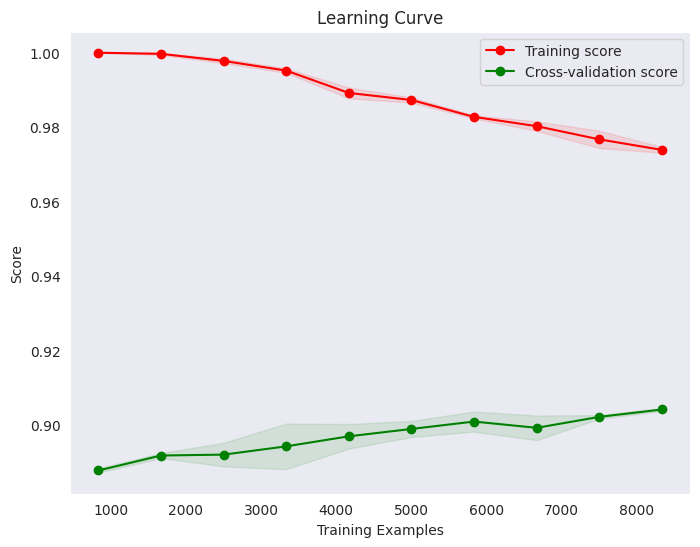

In [130]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier


# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, cv=2, n_jobs=-1, train_sizes=train_sizes)

# Calculate the mean and standard deviation of the training and cross-validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

##Gradient Boost Classifier

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the data into train and test sets
X = encoded_df.drop('RetentionPotential', axis=1) # features
y = encoded_df['RetentionPotential'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the gradient boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1 score:', f1_score(y_test, y_pred, average='micro'))
print('Classification report:', classification_report(y_test, y_pred))

# Print evaluation metrics for the training set (optional)
y_trainpred = gb_model.predict(X_train)
print('Accuracy (training set):', accuracy_score(y_train, y_trainpred))
print('Classification report (training set):', classification_report(y_train, y_trainpred))

Accuracy: 0.9026028547439127
Precision: 0.9026028547439127
Recall: 0.9026028547439127
F1 score: 0.9026028547439128
Classification report:               precision    recall  f1-score   support

           0       0.82      0.54      0.65      1137
           1       0.91      0.98      0.95      5742
           2       0.89      0.73      0.80       267

    accuracy                           0.90      7146
   macro avg       0.87      0.75      0.80      7146
weighted avg       0.90      0.90      0.89      7146

Accuracy (training set): 0.9173563632001919
Classification report (training set):               precision    recall  f1-score   support

           0       0.88      0.59      0.70      2619
           1       0.92      0.99      0.95     13443
           2       0.90      0.78      0.84       612

    accuracy                           0.92     16674
   macro avg       0.90      0.78      0.83     16674
weighted avg       0.92      0.92      0.91     16674



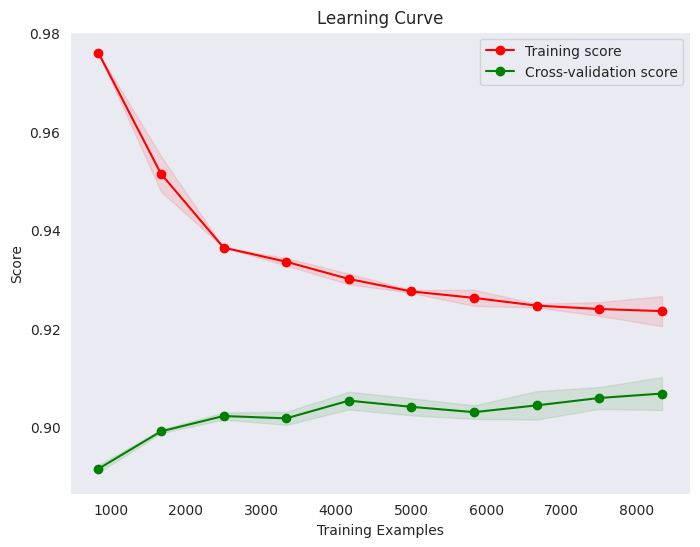

In [132]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier


# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    gb_model, X_train, y_train, cv=2, n_jobs=-1, train_sizes=train_sizes)

# Calculate the mean and standard deviation of the training and cross-validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

##Adab Boost Classifier

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the data into train and test sets
X = encoded_df.drop('RetentionPotential', axis=1) # features
y = encoded_df['RetentionPotential'] # target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_model.predict(X_test)

# Calculate evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1 score:', f1_score(y_test, y_pred, average='macro'))
print('Classification report:', classification_report(y_test, y_pred))

# Print evaluation metrics for the training set (optional)
y_trainpred = ada_model.predict(X_train)
print('Accuracy (training set):', accuracy_score(y_train, y_trainpred))
print('Classification report (training set):', classification_report(y_train, y_trainpred))

Accuracy: 0.8483067450321858
Precision: 0.7569587894632405
Recall: 0.7999916568311138
F1 score: 0.7705653123810227
Classification report:               precision    recall  f1-score   support

           0       0.53      0.77      0.63      1137
           1       0.95      0.87      0.91      5742
           2       0.79      0.76      0.77       267

    accuracy                           0.85      7146
   macro avg       0.76      0.80      0.77      7146
weighted avg       0.88      0.85      0.86      7146

Accuracy (training set): 0.8606213266162889
Classification report (training set):               precision    recall  f1-score   support

           0       0.56      0.77      0.65      2619
           1       0.95      0.88      0.92     13443
           2       0.79      0.77      0.78       612

    accuracy                           0.86     16674
   macro avg       0.77      0.81      0.78     16674
weighted avg       0.88      0.86      0.87     16674



##**Insights**
Based on the classification report, it appears that the model is performing reasonably well on the training set with an accuracy of 0.86. However, on the test set, the model's accuracy drops to 0.84, and also the recall for training set is 77 and for test data is 76 which means the model is better than others 



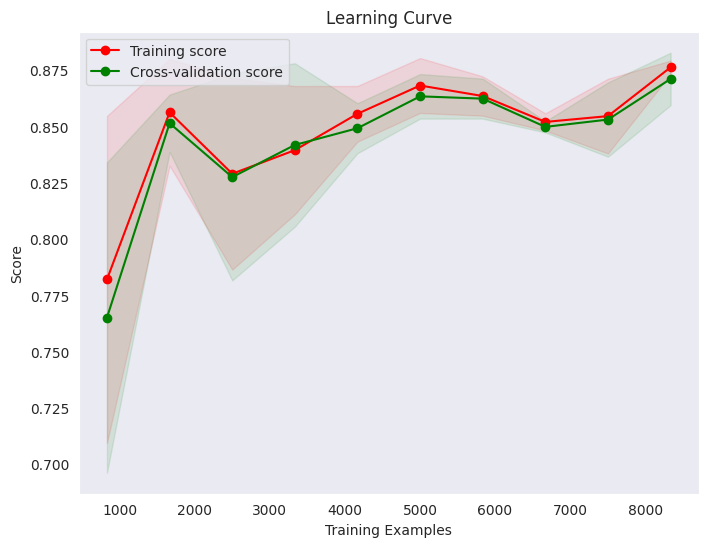

In [134]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier


# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    ada_model, X_train, y_train, cv=2, n_jobs=-1, train_sizes=train_sizes)

# Calculate the mean and standard deviation of the training and cross-validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

#9.Model Building with Hyper Parameter Tuning

# XGBoost Classifier

In [135]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the data into train and test sets
X = encoded_df.drop('RetentionPotential', axis=1) # features
y = encoded_df['RetentionPotential'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the XGBoost Classifier model
xgb_model = XGBClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3],
              'max_depth': [3, 5, 7, 9],
              'subsample': [0.5, 0.7, 1.0],
              'colsample_bytree': [0.5, 0.7, 1.0],
              'n_estimators': [50, 100, 200, 300, 400]}

# Perform Randomized Search Cross Validation to find the best hyperparameters
random_search = RandomizedSearchCV(xgb_model, param_grid, cv=5)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found by the Randomized Search Cross Validation
print('Best hyperparameters:', random_search.best_params_)

# Use the best hyperparameters to create and fit the XGBoost Classifier model
best_xgb_model = XGBClassifier(**random_search.best_params_, random_state=42)
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_xgb_model.predict(X_test)

# Calculate evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1 score:', f1_score(y_test, y_pred, average='micro'))
print('Classification report:', classification_report(y_test, y_pred))

# Print evaluation metrics for the training set (optional)
y_trainpred = best_xgb_model.predict(X_train)
print('Accuracy (training set):', accuracy_score(y_train, y_trainpred))
print('Classification report (training set):', classification_report(y_train, y_trainpred))

Best hyperparameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Accuracy: 0.9095997760985166
Precision: 0.9095997760985166
Recall: 0.9095997760985166
F1 score: 0.9095997760985166
Classification report:               precision    recall  f1-score   support

           0       0.83      0.60      0.69      1137
           1       0.92      0.98      0.95      5742
           2       0.90      0.78      0.83       267

    accuracy                           0.91      7146
   macro avg       0.88      0.78      0.83      7146
weighted avg       0.91      0.91      0.90      7146

Accuracy (training set): 0.9411658870097157
Classification report (training set):               precision    recall  f1-score   support

           0       0.93      0.69      0.79      2619
           1       0.94      0.99      0.96     13443
           2       1.00      0.93      0.97       612

    accuracy                           0.94     16674
  

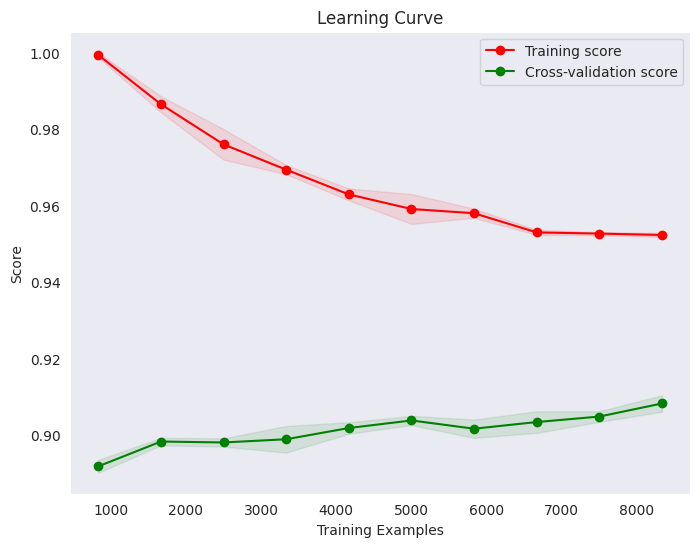

In [136]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier


# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_xgb_model, X_train, y_train, cv=2, n_jobs=-1, train_sizes=train_sizes)

# Calculate the mean and standard deviation of the training and cross-validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

# Decision Tree Classifier

In [137]:
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the data into train and test sets
X = encoded_df.drop('RetentionPotential', axis=1) # features
y = encoded_df['RetentionPotential'] # target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter RandomizedSearch to search
param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 2, 4, 8]}

# Perform randomized search cross-validation to find the best hyperparameters
grid_search = RandomizedSearchCV(tree_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print('Best hyperparameters:', grid_search.best_params_)

# Use the best hyperparameters to create and fit the decision tree model
best_tree_model = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
best_tree_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_tree_model.predict(X_test)

# Calculate evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1 score:', f1_score(y_test, y_pred, average='macro'))
print('Classification report:', classification_report(y_test, y_pred))

# Print evaluation metrics for the training set (optional)
y_trainpred = best_tree_model.predict(X_train)
print('Accuracy (training set):', accuracy_score(y_train, y_trainpred))
print('Classification report (training set):', classification_report(y_train, y_trainpred))

Best hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 7}
Accuracy: 0.9051217464315701
Precision: 0.8580306711190732
Recall: 0.7759929664322329
F1 score: 0.8118844540056789
Classification report:               precision    recall  f1-score   support

           0       0.78      0.62      0.69      1137
           1       0.92      0.97      0.95      5742
           2       0.86      0.74      0.80       267

    accuracy                           0.91      7146
   macro avg       0.86      0.78      0.81      7146
weighted avg       0.90      0.91      0.90      7146

Accuracy (training set): 0.9153772340170325
Classification report (training set):               precision    recall  f1-score   support

           0       0.81      0.64      0.72      2619
           1       0.93      0.98      0.95     13443
           2       0.91      0.77      0.83       612

    accuracy                           0.92     16674
   macro avg       0.89      0.79      0

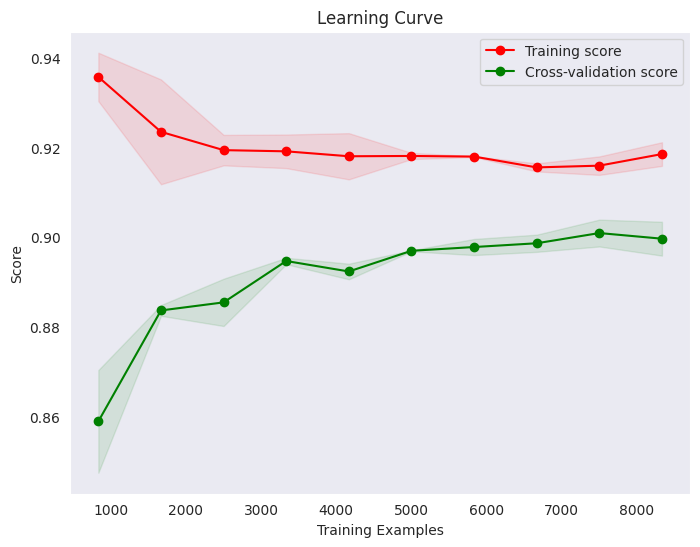

In [138]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier


# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_tree_model, X_train, y_train, cv=2, n_jobs=-1, train_sizes=train_sizes)

# Calculate the mean and standard deviation of the training and cross-validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

# Random Forest Clasifier

In [139]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the data into train and test sets
X = encoded_df.drop('RetentionPotential', axis=1) # features
y = encoded_df['RetentionPotential'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {'n_estimators': [50, 100, 200, 300, 400],
              'max_depth': [5, 10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

# Perform Randomized Search Cross Validation to find the best hyperparameters
random_search = RandomizedSearchCV(rf_model, param_grid, cv=5)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found by the Randomized Search Cross Validation
print('Best hyperparameters:', random_search.best_params_)

# Use the best hyperparameters to create and fit the Random Forest Classifier model
best_rf_model = RandomForestClassifier(**random_search.best_params_, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1 score:', f1_score(y_test, y_pred, average='micro'))
print('Classification report:', classification_report(y_test, y_pred))

# Print evaluation metrics for the training set (optional)
y_trainpred = best_rf_model.predict(X_train)
print('Accuracy (training set):', accuracy_score(y_train, y_trainpred))
print('Classification report (training set):', classification_report(y_train, y_trainpred))

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}
Accuracy: 0.9073607612650434
Precision: 0.9073607612650434
Recall: 0.9073607612650434
F1 score: 0.9073607612650434
Classification report:               precision    recall  f1-score   support

           0       0.81      0.60      0.69      1137
           1       0.92      0.97      0.95      5742
           2       0.87      0.78      0.83       267

    accuracy                           0.91      7146
   macro avg       0.87      0.79      0.82      7146
weighted avg       0.90      0.91      0.90      7146

Accuracy (training set): 0.9354084202950702
Classification report (training set):               precision    recall  f1-score   support

           0       0.91      0.69      0.78      2619
           1       0.94      0.99      0.96     13443
           2       0.95      0.82      0.88       612

    accuracy                           0.94     166

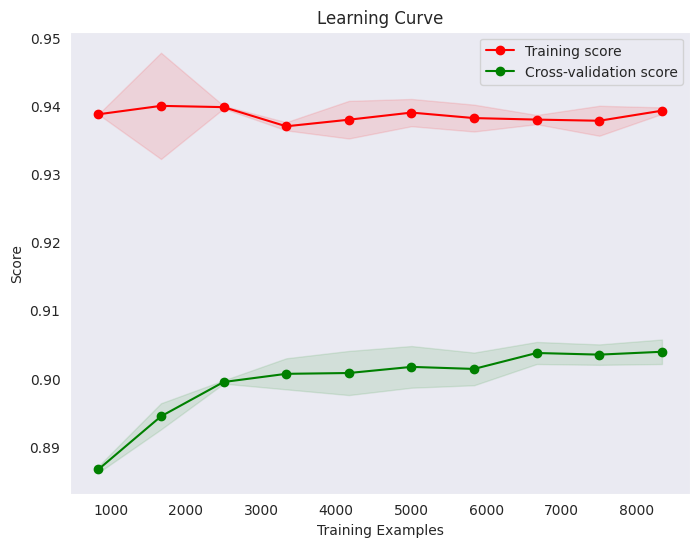

In [140]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier


# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X_train, y_train, cv=2, n_jobs=-1, train_sizes=train_sizes)

# Calculate the mean and standard deviation of the training and cross-validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

# K-Nearest Neighbour Classifier

In [141]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the data into train and test sets
X = encoded_df.drop('RetentionPotential', axis=1) # features
y = encoded_df['RetentionPotential'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the KNN classifier model
knn_model = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [10, 20, 30, 40, 50],
              'p': [1, 2]}

# Perform Randomized Search Cross Validation to find the best hyperparameters
random_search = RandomizedSearchCV(knn_model, param_grid, cv=5)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found by the Randomized Search Cross Validation
print('Best hyperparameters:', random_search.best_params_)

# Use the best hyperparameters to create and fit the KNN classifier model
best_knn_model = KNeighborsClassifier(**random_search.best_params_)
best_knn_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_knn_model.predict(X_test)

# Calculate evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1 score:', f1_score(y_test, y_pred, average='micro'))
print('Classification report:', classification_report(y_test, y_pred))

# Print evaluation metrics for the training set (optional)
y_trainpred = best_knn_model.predict(X_train)
print('Accuracy (training set):', accuracy_score(y_train, y_trainpred))

Best hyperparameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 7, 'leaf_size': 40, 'algorithm': 'auto'}
Accuracy: 0.8498460677301987
Precision: 0.8498460677301987
Recall: 0.8498460677301987
F1 score: 0.8498460677301986
Classification report:               precision    recall  f1-score   support

           0       0.61      0.49      0.54      1137
           1       0.89      0.95      0.92      5742
           2       0.71      0.14      0.23       267

    accuracy                           0.85      7146
   macro avg       0.74      0.53      0.56      7146
weighted avg       0.84      0.85      0.83      7146

Accuracy (training set): 0.8763943864699533


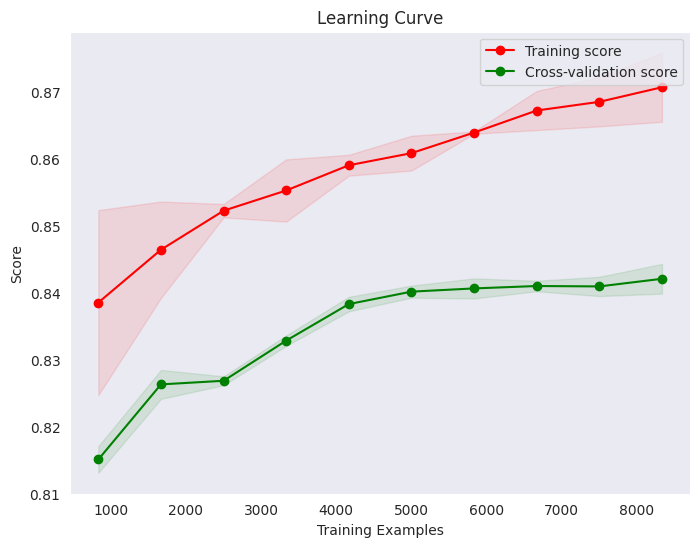

In [142]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier


# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_knn_model, X_train, y_train, cv=2, n_jobs=-1, train_sizes=train_sizes)

# Calculate the mean and standard deviation of the training and cross-validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

#10.CUSTOMER SEGMENTATION

In [143]:
transac_train.columns

Index(['CustomerID', 'DateOfOrder', 'timestamp', 'OrderQuantity', 'Month'], dtype='object')

In [144]:
rfm_df

,R,F,M
CustomerID,,,
C12116,1564,3,38.333333
C12117,1508,1,41.000000
C12118,1594,1,41.000000
C12119,1552,1,52.000000
C12120,1472,1,31.000000
...,...,...,...
C42185,2210,13,103.076923
C42186,1520,1,46.000000
C42187,1589,1,41.000000


In [145]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select the columns to be scaled
cols_to_scale = ["R", "F", "M"]

# Scale the selected columns
rfm_df_scaled = scaler.fit_transform(rfm_df[cols_to_scale])



In [146]:
rfm_df_scaled

array([[ 0.20365768, -0.11511692, -0.61856007],
       [ 0.12075811, -0.27983145, -0.54904839],
       [ 0.24806816, -0.27983145, -0.54904839],
       ...,
       [ 0.24066641, -0.27983145, -0.54904839],
       [ 1.29467522, -0.27983145, -0.28837959],
       [ 0.1503651 , -0.19747418,  0.72822871]])

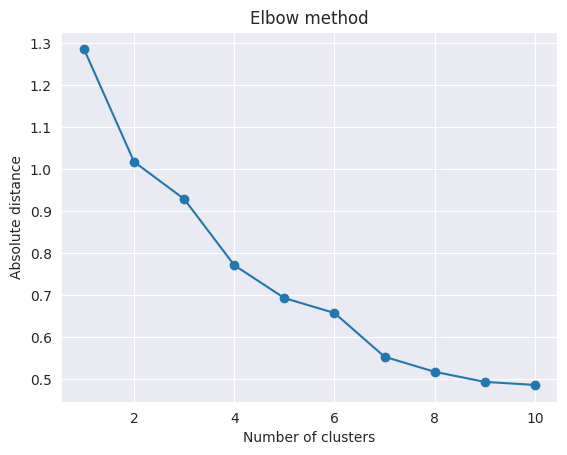

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Select the columns to be used for clustering
cols_to_cluster = ["R", "F", "M"]

# Set the maximum number of clusters to try
max_clusters = 10

# Create an empty list to store the absolute distance
abs_dist = []

# Loop over the range of number of clusters
for i in range(1, max_clusters+1):
    # Create a KMeans object with i clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000)

    # Fit the KMeans object to the scaled data
    kmeans.fit(rfm_df_scaled)

    # Append the absolute distance to the list
    abs_dist.append(sum(np.min(cdist(rfm_df_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / rfm_df_scaled.shape[0])

# Plot the absolute distance for each number of clusters
plt.plot(range(1, max_clusters+1), abs_dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Absolute distance')
plt.title('Elbow method')
plt.show()


In [148]:
# Fit KMeans clustering algorithm to the data with 5 clusters
kmeans_clust = KMeans(n_clusters=4, init='k-means++', max_iter=1000)
kmeans_clust.fit(rfm_df_scaled)

# Add the cluster labels to the original dataframe
rfm_df["Cluster"] = kmeans_clust.labels_
rfm_df



,R,F,M,Cluster
CustomerID,,,,
C12116,1564,3,38.333333,1
C12117,1508,1,41.000000,1
C12118,1594,1,41.000000,1
C12119,1552,1,52.000000,1
C12120,1472,1,31.000000,1
...,...,...,...,...
C42185,2210,13,103.076923,0
C42186,1520,1,46.000000,1
C42187,1589,1,41.000000,1


<Axes: xlabel='R', ylabel='F'>

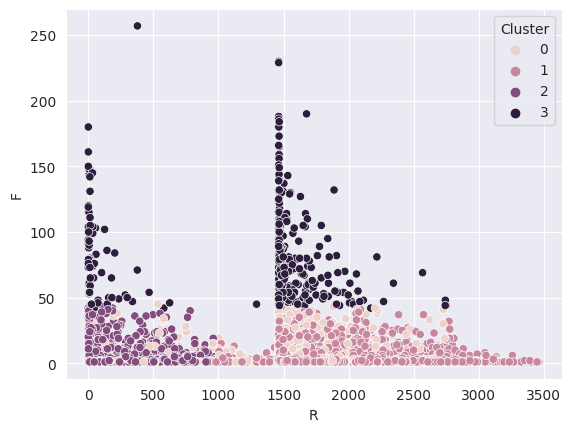

In [149]:
sns.scatterplot(data=rfm_df,x="R",y="F",hue="Cluster")

#11.TEST DATA PREDICTIONS

In [150]:
customer_test = pd.read_excel('/content/Customerdata_Test.xlsx') 
email_test = pd.read_excel('/content/Emaildata_Test.xlsx')
retpot_test = pd.read_excel('/content/Test.xlsx')
transac_test = pd.read_excel('/content/transactionsdata_Test.xlsx')

In [151]:
print('shape of customer_test',customer_test.shape)
print('shape of email_test',email_test.shape)
print('shape of retpot_test',retpot_test.shape)
print('shape of transac_test',transac_test.shape)

shape of customer_test (5955, 7)
shape of email_test (129074, 6)
shape of retpot_test (5955, 1)
shape of transac_test (26768, 4)


In [152]:
customer_test.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C17838,CITY4,2010-10-22,0,0,0,Thursday
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday
2,C19041,CITY4,2011-01-24,0,1,0,Friday
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday
4,C26718,CITY2,2010-10-02,1,0,0,Monday


In [153]:
email_test.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable


In [154]:
email_test.tail()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
129069,C30169,2018-01-15,CustomizedEmail,13:55:28,no,no
129070,C30169,2018-01-15,CustomizedEmail,15:17:34,no,no
129071,C30169,2018-01-15,CustomizedEmail,10:24:54,yes,yes
129072,C30169,2018-01-15,CustomizedEmail,17:15:26,yes,no
129073,C30169,2018-01-15,CustomizedEmail,10:10:10,yes,no


In [155]:
# combine the 'Date of email' and 'Time' columns into a single datetime column
email_test['DateOfemail'] = pd.to_datetime(email_test['DateOfemail'])

In [156]:
email_test.drop('timestamp',axis=1,inplace=True)

In [157]:
#filtering persons who received only customized mail
customized_mail=email_test[email_test['EmailType'] == 'CustomizedEmail']

In [158]:
# Group the data by CustomerID and EmailType, and calculate the number of emails sent, the first email date, and the last email date
customized_mail_1 = customized_mail.groupby(['CustomerID', 'EmailType']).agg(
    num_emails=('CustomerID', 'count'), # Number of emails
    first_email_date=('DateOfemail', 'min'), # First email date
    last_email_date=('DateOfemail', 'max') # Last email date
)

# Reset the index of the resulting DataFrame
customized_mail_1 = customized_mail_1.reset_index(drop=False)

In [159]:
customized_mail_1

,CustomerID,EmailType,num_emails,first_email_date,last_email_date
0,C12121,CustomizedEmail,24,2017-12-05,2017-12-13
1,C12135,CustomizedEmail,29,2017-11-02,2018-01-10
2,C12136,CustomizedEmail,41,2013-09-29,2013-10-19
3,C12157,CustomizedEmail,27,2013-10-05,2013-11-25
4,C12163,CustomizedEmail,46,2012-10-29,2012-11-19
...,...,...,...,...,...
3493,C42147,CustomizedEmail,36,2013-10-29,2013-11-30
3494,C42148,CustomizedEmail,46,2009-10-02,2011-11-11
3495,C42151,CustomizedEmail,45,2011-12-12,2013-02-12
3496,C42153,CustomizedEmail,10,2012-09-10,2012-11-08


In [160]:
customized_mail_1['DateOfemail'] = customized_mail_1['last_email_date']

In [161]:
customized_mail_1

,CustomerID,EmailType,num_emails,first_email_date,last_email_date,DateOfemail
0,C12121,CustomizedEmail,24,2017-12-05,2017-12-13,2017-12-13
1,C12135,CustomizedEmail,29,2017-11-02,2018-01-10,2018-01-10
2,C12136,CustomizedEmail,41,2013-09-29,2013-10-19,2013-10-19
3,C12157,CustomizedEmail,27,2013-10-05,2013-11-25,2013-11-25
4,C12163,CustomizedEmail,46,2012-10-29,2012-11-19,2012-11-19
...,...,...,...,...,...,...
3493,C42147,CustomizedEmail,36,2013-10-29,2013-11-30,2013-11-30
3494,C42148,CustomizedEmail,46,2009-10-02,2011-11-11,2011-11-11
3495,C42151,CustomizedEmail,45,2011-12-12,2013-02-12,2013-02-12
3496,C42153,CustomizedEmail,10,2012-09-10,2012-11-08,2012-11-08


In [162]:
# Calculate email engagement metrics for each customer
email_metrics = customized_mail.groupby("CustomerID").agg(
    num_emails=("CustomerID", "count"),
    num_emails_opened=("MailOpened", lambda x: sum(x == "yes")),
    num_emails_clicked=("MailClicked", lambda x: sum(x == "yes")),
)

In [163]:
email_metrics

,num_emails,num_emails_opened,num_emails_clicked
CustomerID,,,
C12121,24,8,3
C12135,29,8,5
C12136,41,3,1
C12157,27,13,0
C12163,46,1,0
...,...,...,...
C42147,36,11,5
C42148,46,6,2
C42151,45,9,3


In [164]:
mail_data= pd.merge(customized_mail_1,email_metrics,on=['CustomerID','num_emails'],how='inner')

In [165]:
# Filter the DataFrame to include only customers who received a welcome email
welcome_mail = email_test[email_test['EmailType'] == 'WelcomeEmail']

# Filter out customers who also received a customized email
customized_mail = email_test[email_test['EmailType'] == 'CustomizedEmail']
customers_with_customized_mail = set(customized_mail['CustomerID'].unique())
welcome_mail = welcome_mail[~welcome_mail['CustomerID'].isin(customers_with_customized_mail)]

# Count the number of unique customers in the resulting DataFrame
num_customers = welcome_mail['CustomerID'].nunique()

In [166]:
welcome_mail

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable
5,C31010,2010-04-24,WelcomeEmail,yes,NotApplicable
8,C23833,2010-08-27,WelcomeEmail,yes,NotApplicable
10,C38598,2010-11-03,WelcomeEmail,yes,NotApplicable
13,C20404,2010-05-01,WelcomeEmail,yes,NotApplicable
...,...,...,...,...,...
5950,C32947,2018-01-17,WelcomeEmail,yes,NotApplicable
5951,C28951,2018-01-17,WelcomeEmail,yes,NotApplicable
5952,C38741,2018-01-17,WelcomeEmail,yes,NotApplicable
5953,C20407,2018-01-17,WelcomeEmail,yes,NotApplicable


In [167]:
# Group the data by CustomerID and EmailType, and calculate the number of emails sent, the first email date, and the last email date
welcome_mail_1 = welcome_mail.groupby(['CustomerID', 'EmailType']).agg(
    num_emails=('CustomerID', 'count'), # Number of emails
    first_email_date=('DateOfemail', 'min'), # First email date
    last_email_date=('DateOfemail', 'max') # Last email date
)

# Reset the index of the resulting DataFrame
welcome_mail_1 = welcome_mail_1.reset_index(drop=False)

In [168]:
welcome_mail_1['DateOfemail'] = welcome_mail_1['last_email_date']

In [169]:
# Calculate email engagement metrics for each customer
email_metrics = welcome_mail.groupby("CustomerID").agg(
    num_emails=("CustomerID", "count"),
    num_emails_opened=("MailOpened", lambda x: sum(x == "yes")),
    num_emails_clicked=("MailClicked", lambda x: sum(x == "yes")),
)

In [170]:
email_metrics

,num_emails,num_emails_opened,num_emails_clicked
CustomerID,,,
C12132,1,1,0
C12134,1,1,0
C12139,1,1,0
C12142,1,1,0
C12146,1,1,0
...,...,...,...
C42131,1,1,0
C42146,1,1,0
C42155,1,1,0


In [171]:
mail_data_2= pd.merge(welcome_mail_1,email_metrics,on=['CustomerID','num_emails'],how='inner')

In [172]:
mail_data_3= pd.concat([mail_data,mail_data_2])

In [173]:
mail_data_3

,CustomerID,EmailType,num_emails,first_email_date,last_email_date,DateOfemail,num_emails_opened,num_emails_clicked
0,C12121,CustomizedEmail,24,2017-12-05,2017-12-13,2017-12-13,8,3
1,C12135,CustomizedEmail,29,2017-11-02,2018-01-10,2018-01-10,8,5
2,C12136,CustomizedEmail,41,2013-09-29,2013-10-19,2013-10-19,3,1
3,C12157,CustomizedEmail,27,2013-10-05,2013-11-25,2013-11-25,13,0
4,C12163,CustomizedEmail,46,2012-10-29,2012-11-19,2012-11-19,1,0
...,...,...,...,...,...,...,...,...
2452,C42131,WelcomeEmail,1,2013-10-31,2013-10-31,2013-10-31,1,0
2453,C42146,WelcomeEmail,1,2012-09-22,2012-09-22,2012-09-22,1,0
2454,C42155,WelcomeEmail,1,2013-09-14,2013-09-14,2013-09-14,1,0
2455,C42157,WelcomeEmail,1,2013-09-30,2013-09-30,2013-09-30,1,0


In [174]:
transac_test.columns

Index(['CustomerID', 'DateOfOrder', 'timestamp', 'OrderQuantity'], dtype='object')

In [175]:
# Convert the 'DateOfOrder' column to a datetime format
transac_test['DateOfOrder'] = pd.to_datetime(transac_test['DateOfOrder'])

# Group the transaction data by customer ID and apply aggregation functions
customer_data3 = transac_test.groupby('CustomerID').agg(
    first_order_date=('DateOfOrder', 'min'),
    last_order_date=('DateOfOrder', 'max'),
    total_order_quantity=('OrderQuantity', 'sum')
).reset_index()

# Print the resulting DataFrame
print(customer_data3.head())

  CustomerID first_order_date last_order_date  total_order_quantity
0     C12121       2017-12-14      2017-12-14                    52
1     C12132       2013-10-20      2013-10-20                    40
2     C12134       2013-09-18      2013-09-18                    40
3     C12135       2018-01-10      2018-01-10                    41
4     C12136       2013-10-19      2013-10-19                    79


In [176]:
test_data=customer_test.merge(retpot_test, on="CustomerID").merge(mail_data_3, on="CustomerID").merge(customer_data3, on="CustomerID")
test_data.shape

(5955, 17)

In [177]:
test_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,num_emails,first_email_date,last_email_date,DateOfemail,num_emails_opened,num_emails_clicked,first_order_date,last_order_date,total_order_quantity
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,WelcomeEmail,1,2010-10-22,2010-10-22,2010-10-22,1,0,2011-03-28,2011-03-28,55
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,CustomizedEmail,46,2008-11-25,2013-12-29,2013-12-29,37,7,2010-10-12,2014-01-14,29537
2,C19041,CITY4,2011-01-24,0,1,0,Friday,CustomizedEmail,60,2011-02-07,2013-12-31,2013-12-31,26,4,2011-05-16,2014-01-16,14321
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday,CustomizedEmail,45,2010-09-19,2010-11-08,2010-11-08,0,0,2010-11-09,2010-11-09,47
4,C26718,CITY2,2010-10-02,1,0,0,Monday,CustomizedEmail,13,2011-03-26,2014-01-12,2014-01-12,8,2,2011-01-25,2014-01-12,20238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C32947,CITY2,2018-01-17,1,0,0,Friday,WelcomeEmail,1,2018-01-17,2018-01-17,2018-01-17,1,0,2018-01-17,2018-01-17,41
5951,C28951,CITY3,2018-01-17,1,0,0,Friday,WelcomeEmail,1,2018-01-17,2018-01-17,2018-01-17,1,0,2018-01-17,2018-01-17,40
5952,C38741,CITY3,2018-01-17,1,0,0,Monday,WelcomeEmail,1,2018-01-17,2018-01-17,2018-01-17,1,0,2018-01-17,2018-01-17,36
5953,C20407,CITY2,2018-01-17,1,0,0,Friday,WelcomeEmail,1,2018-01-17,2018-01-17,2018-01-17,1,0,2018-01-17,2018-01-17,75


In [178]:
test_data.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
EmailType                       object
num_emails                       int64
first_email_date        datetime64[ns]
last_email_date         datetime64[ns]
DateOfemail             datetime64[ns]
num_emails_opened                int64
num_emails_clicked               int64
first_order_date        datetime64[ns]
last_order_date         datetime64[ns]
total_order_quantity             int64
dtype: object

In [179]:
print("Null Values Count")
test_data.isna().sum()

Null Values Count


CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
EmailType               0
num_emails              0
first_email_date        0
last_email_date         0
DateOfemail             0
num_emails_opened       0
num_emails_clicked      0
first_order_date        0
last_order_date         0
total_order_quantity    0
dtype: int64

In [180]:
# Convert the 'DateOfRegistration' column to datetime format
test_data['DateOfRegistration'] = pd.to_datetime(test_data['DateOfRegistration'])

# Create a new column 'RegistrationYear' containing the year of registration
test_data['RegistrationYear'] = test_data['DateOfRegistration'].dt.year

# Group by 'RegistrationYear' and count the number of unique customers
customer_counts = test_data.groupby('RegistrationYear')['CustomerID'].nunique()

In [181]:
# Convert 'DateOfOrder' column to datetime
transac_test['DateOfOrder'] = pd.to_datetime(transac_test['DateOfOrder'])

# Create a new column for month
transac_test['Month'] = transac_test['DateOfOrder'].dt.month

# Group transactions by month and sum the order quantities
monthly_orders = transac_test.groupby(['Month'])['OrderQuantity'].sum()

max_month = monthly_orders.idxmax()
min_month = monthly_orders.idxmin()

In [182]:
Dates=['last_order_date','DateOfRegistration']

for i in Dates:
    test_data[i]=pd.to_datetime(test_data[i], format='%Y-%m-%d')
    test_data[i+'year']=pd.DatetimeIndex(test_data[i]).year
    test_data[i+'month']=pd.DatetimeIndex(test_data[i]).month
    test_data[i+'day']=pd.DatetimeIndex(test_data[i]).day
test_data.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'EmailType', 'num_emails', 'first_email_date', 'last_email_date',
       'DateOfemail', 'num_emails_opened', 'num_emails_clicked',
       'first_order_date', 'last_order_date', 'total_order_quantity',
       'RegistrationYear', 'last_order_dateyear', 'last_order_datemonth',
       'last_order_dateday', 'DateOfRegistrationyear',
       'DateOfRegistrationmonth', 'DateOfRegistrationday'],
      dtype='object')

In [183]:
categorical = ['EmailType','City','OnlineCommunication','AutomaticRefill','DoorstepDelivery','PreferredDeliveryDay']
test_data[categorical] =test_data[categorical].astype('category')
test_data[categorical].dtypes

EmailType               category
City                    category
OnlineCommunication     category
AutomaticRefill         category
DoorstepDelivery        category
PreferredDeliveryDay    category
dtype: object

In [184]:
# Calculate the average order quantity
orders_df = transac_test.groupby('CustomerID')['OrderQuantity'].agg(['sum', 'count']).reset_index()
orders_df['avg_order_quantity'] = orders_df['sum'] / orders_df['count']

In [185]:
test_data['avg_order_quantity'] = orders_df['avg_order_quantity']

In [186]:
import pandas as pd


# Convert the date columns to datetime format
test_data['DateOfRegistration'] = pd.to_datetime(test_data['DateOfRegistration'])
test_data['first_order_date'] = pd.to_datetime(test_data['first_order_date'])
# Calculate the time difference in days
test_data['time_between_registration_and_first_order'] = (test_data['first_order_date'] - test_data['DateOfRegistration']).dt.days

In [187]:
test_data['time_between_first_last_order'] = (test_data['last_order_date'] - test_data['first_order_date']).dt.days

In [188]:
# group the orders by `customer_id` and find the maximum `order_date` for each group
last_order_dates = transac_test.groupby('CustomerID')['DateOfOrder'].max()


# find the last order date across all customers
last_order_date_all = last_order_dates.max()

# define the customer_id of interest
customer_id = test_data['CustomerID']

# find the last order date of the customer of interest
last_order_date_customer = last_order_dates.loc[customer_id]

# calculate the number of days between the most recent order date of the customer of interest and the most recent order date across all customers
recency_customer = (last_order_date_all - last_order_date_customer).dt.days

In [189]:
# add a new column 'recencyz_customer' to the train_data dataframe
test_data['recency_customer'] = recency_customer.values

In [190]:
test_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,num_emails,first_email_date,...,last_order_dateyear,last_order_datemonth,last_order_dateday,DateOfRegistrationyear,DateOfRegistrationmonth,DateOfRegistrationday,avg_order_quantity,time_between_registration_and_first_order,time_between_first_last_order,recency_customer
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,WelcomeEmail,1,2010-10-22,...,2011,3,28,2010,10,22,52.000000,157,0,2491
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,CustomizedEmail,46,2008-11-25,...,2014,1,14,2008,11,17,40.000000,694,1190,1468
2,C19041,CITY4,2011-01-24,0,1,0,Friday,CustomizedEmail,60,2011-02-07,...,2014,1,16,2011,1,24,40.000000,112,976,1466
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday,CustomizedEmail,45,2010-09-19,...,2010,11,9,2010,9,18,41.000000,52,0,2630
4,C26718,CITY2,2010-10-02,1,0,0,Monday,CustomizedEmail,13,2011-03-26,...,2014,1,12,2010,10,2,79.000000,115,1083,1470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C32947,CITY2,2018-01-17,1,0,0,Friday,WelcomeEmail,1,2018-01-17,...,2018,1,17,2018,1,17,75.800000,0,0,4
5951,C28951,CITY3,2018-01-17,1,0,0,Friday,WelcomeEmail,1,2018-01-17,...,2018,1,17,2018,1,17,41.000000,0,0,4
5952,C38741,CITY3,2018-01-17,1,0,0,Monday,WelcomeEmail,1,2018-01-17,...,2018,1,17,2018,1,17,41.000000,0,0,4
5953,C20407,CITY2,2018-01-17,1,0,0,Friday,WelcomeEmail,1,2018-01-17,...,2018,1,17,2018,1,17,83.666667,0,0,4


In [191]:
test_data.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'EmailType', 'num_emails', 'first_email_date', 'last_email_date',
       'DateOfemail', 'num_emails_opened', 'num_emails_clicked',
       'first_order_date', 'last_order_date', 'total_order_quantity',
       'RegistrationYear', 'last_order_dateyear', 'last_order_datemonth',
       'last_order_dateday', 'DateOfRegistrationyear',
       'DateOfRegistrationmonth', 'DateOfRegistrationday',
       'avg_order_quantity', 'time_between_registration_and_first_order',
       'time_between_first_last_order', 'recency_customer'],
      dtype='object')

In [192]:
#Calculate the time elapsed in days between two datetime columns
test_data['email_time_elapse'] = (test_data['last_email_date'] - test_data['first_email_date']).dt.days
test_data['order_time_elapse'] = (test_data['last_order_date'] - test_data['first_order_date']).dt.days

In [193]:
test_data.drop(['CustomerID','last_email_date','last_order_dateyear','last_order_datemonth','first_email_date','first_order_date','last_order_date','DateOfemail','DateOfRegistration','RegistrationYear','last_order_dateday','DateOfRegistrationday'],axis=1,inplace=True)

In [194]:
test_data.dtypes

City                                         category
OnlineCommunication                          category
AutomaticRefill                              category
DoorstepDelivery                             category
PreferredDeliveryDay                         category
EmailType                                    category
num_emails                                      int64
num_emails_opened                               int64
num_emails_clicked                              int64
total_order_quantity                            int64
DateOfRegistrationyear                          int64
DateOfRegistrationmonth                         int64
avg_order_quantity                            float64
time_between_registration_and_first_order       int64
time_between_first_last_order                   int64
recency_customer                                int64
email_time_elapse                               int64
order_time_elapse                               int64
dtype: object

In [195]:
numerical_features=[]
categorical_features=[]
date_features=[]
for i in test_data.columns:
  if test_data[i].dtypes =='category':
    categorical_features.append(i)
  else:
    numerical_features.append(i)

In [196]:
categorical_features

['City',
 'OnlineCommunication',
 'AutomaticRefill',
 'DoorstepDelivery',
 'PreferredDeliveryDay',
 'EmailType']

In [197]:
df_encoded = pd.get_dummies(test_data[categorical_features], columns=['OnlineCommunication','AutomaticRefill','DoorstepDelivery','City', 'PreferredDeliveryDay', 'EmailType'])

In [198]:
df_encoded

,OnlineCommunication_0,OnlineCommunication_1,AutomaticRefill_0,AutomaticRefill_1,DoorstepDelivery_0,DoorstepDelivery_1,City_CITY1,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,EmailType_CustomizedEmail,EmailType_WelcomeEmail
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
5951,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
5952,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
5953,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [199]:
df_encoded.drop(['OnlineCommunication_1','AutomaticRefill_1','DoorstepDelivery_1','EmailType_CustomizedEmail'],axis=1,inplace=True)

In [200]:
df_encoded = df_encoded.reset_index()

In [201]:
df_encoded.drop('index',axis=1,inplace=True)

In [202]:
df_encoded.dtypes

OnlineCommunication_0             uint8
AutomaticRefill_0                 uint8
DoorstepDelivery_0                uint8
City_CITY1                        uint8
City_CITY2                        uint8
City_CITY3                        uint8
City_CITY4                        uint8
PreferredDeliveryDay_Friday       uint8
PreferredDeliveryDay_Monday       uint8
PreferredDeliveryDay_Saturday     uint8
PreferredDeliveryDay_Sunday       uint8
PreferredDeliveryDay_Thursday     uint8
PreferredDeliveryDay_Tuesday      uint8
PreferredDeliveryDay_Wednesday    uint8
EmailType_WelcomeEmail            uint8
dtype: object

In [203]:
from sklearn.preprocessing import MinMaxScaler


# Apply MinMaxScaler to selected features
scaler = MinMaxScaler()
test_data[numerical_features] = scaler.fit_transform(test_data[numerical_features])

In [204]:
test_data[numerical_features].reset_index()

,index,num_emails,num_emails_opened,num_emails_clicked,total_order_quantity,DateOfRegistrationyear,DateOfRegistrationmonth,avg_order_quantity,time_between_registration_and_first_order,time_between_first_last_order,recency_customer,email_time_elapse,order_time_elapse
0,0,0.000000,0.003690,0.000000,0.000932,0.2,0.818182,0.105082,0.104250,0.000000,0.721402,0.000000,0.000000
1,1,0.161871,0.136531,0.058824,0.509602,0.0,0.909091,0.080357,0.460823,0.616580,0.425138,0.938920,0.616580
2,2,0.212230,0.095941,0.033613,0.247071,0.3,0.000000,0.080357,0.074369,0.505699,0.424558,0.534074,0.505699
3,3,0.158273,0.000000,0.000000,0.000794,0.2,0.727273,0.082418,0.034529,0.000000,0.761657,0.025240,0.000000
4,4,0.043165,0.029520,0.016807,0.349161,0.2,0.818182,0.160714,0.076361,0.561140,0.425717,0.516406,0.561140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,5950,0.000000,0.003690,0.000000,0.000690,1.0,0.000000,0.154121,0.000000,0.000000,0.001158,0.000000,0.000000
5951,5951,0.000000,0.003690,0.000000,0.000673,1.0,0.000000,0.082418,0.000000,0.000000,0.001158,0.000000,0.000000
5952,5952,0.000000,0.003690,0.000000,0.000604,1.0,0.000000,0.082418,0.000000,0.000000,0.001158,0.000000,0.000000
5953,5953,0.000000,0.003690,0.000000,0.001277,1.0,0.000000,0.170330,0.000000,0.000000,0.001158,0.000000,0.000000


In [205]:
test_data[numerical_features]

,num_emails,num_emails_opened,num_emails_clicked,total_order_quantity,DateOfRegistrationyear,DateOfRegistrationmonth,avg_order_quantity,time_between_registration_and_first_order,time_between_first_last_order,recency_customer,email_time_elapse,order_time_elapse
0,0.000000,0.003690,0.000000,0.000932,0.2,0.818182,0.105082,0.104250,0.000000,0.721402,0.000000,0.000000
1,0.161871,0.136531,0.058824,0.509602,0.0,0.909091,0.080357,0.460823,0.616580,0.425138,0.938920,0.616580
2,0.212230,0.095941,0.033613,0.247071,0.3,0.000000,0.080357,0.074369,0.505699,0.424558,0.534074,0.505699
3,0.158273,0.000000,0.000000,0.000794,0.2,0.727273,0.082418,0.034529,0.000000,0.761657,0.025240,0.000000
4,0.043165,0.029520,0.016807,0.349161,0.2,0.818182,0.160714,0.076361,0.561140,0.425717,0.516406,0.561140
...,...,...,...,...,...,...,...,...,...,...,...,...
5950,0.000000,0.003690,0.000000,0.000690,1.0,0.000000,0.154121,0.000000,0.000000,0.001158,0.000000,0.000000
5951,0.000000,0.003690,0.000000,0.000673,1.0,0.000000,0.082418,0.000000,0.000000,0.001158,0.000000,0.000000
5952,0.000000,0.003690,0.000000,0.000604,1.0,0.000000,0.082418,0.000000,0.000000,0.001158,0.000000,0.000000
5953,0.000000,0.003690,0.000000,0.001277,1.0,0.000000,0.170330,0.000000,0.000000,0.001158,0.000000,0.000000


In [206]:
encoded_df = pd.concat([df_encoded, test_data[numerical_features]], axis=1)

In [207]:
encoded_df

,OnlineCommunication_0,AutomaticRefill_0,DoorstepDelivery_0,City_CITY1,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,...,num_emails_clicked,total_order_quantity,DateOfRegistrationyear,DateOfRegistrationmonth,avg_order_quantity,time_between_registration_and_first_order,time_between_first_last_order,recency_customer,email_time_elapse,order_time_elapse
0,1,1,1,0,0,0,1,0,0,0,...,0.000000,0.000932,0.2,0.818182,0.105082,0.104250,0.000000,0.721402,0.000000,0.000000
1,0,0,1,0,1,0,0,0,0,0,...,0.058824,0.509602,0.0,0.909091,0.080357,0.460823,0.616580,0.425138,0.938920,0.616580
2,1,0,1,0,0,0,1,1,0,0,...,0.033613,0.247071,0.3,0.000000,0.080357,0.074369,0.505699,0.424558,0.534074,0.505699
3,1,1,1,0,1,0,0,0,0,0,...,0.000000,0.000794,0.2,0.727273,0.082418,0.034529,0.000000,0.761657,0.025240,0.000000
4,0,1,1,0,1,0,0,0,1,0,...,0.016807,0.349161,0.2,0.818182,0.160714,0.076361,0.561140,0.425717,0.516406,0.561140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,0,1,1,0,1,0,0,1,0,0,...,0.000000,0.000690,1.0,0.000000,0.154121,0.000000,0.000000,0.001158,0.000000,0.000000
5951,0,1,1,0,0,1,0,1,0,0,...,0.000000,0.000673,1.0,0.000000,0.082418,0.000000,0.000000,0.001158,0.000000,0.000000
5952,0,1,1,0,0,1,0,0,1,0,...,0.000000,0.000604,1.0,0.000000,0.082418,0.000000,0.000000,0.001158,0.000000,0.000000
5953,0,1,1,0,1,0,0,1,0,0,...,0.000000,0.001277,1.0,0.000000,0.170330,0.000000,0.000000,0.001158,0.000000,0.000000


In [208]:
predictions=ada_model.predict(encoded_df)

In [209]:
test_predictions = predictions

In [210]:
retpot_test['RetentionPotential'] = test_predictions

In [211]:
retpot_test.to_csv('Test_Predictions')

In [212]:
s=pd.read_excel("/content/Test.xlsx")

In [213]:
s["RetentionPotential"]=predictions

In [214]:
s["RetentionPotential"].value_counts()

1    4425
0    1335
2     195
Name: RetentionPotential, dtype: int64

#12.PATRENS

In [215]:
encoded_df.columns

Index(['OnlineCommunication_0', 'AutomaticRefill_0', 'DoorstepDelivery_0',
       'City_CITY1', 'City_CITY2', 'City_CITY3', 'City_CITY4',
       'PreferredDeliveryDay_Friday', 'PreferredDeliveryDay_Monday',
       'PreferredDeliveryDay_Saturday', 'PreferredDeliveryDay_Sunday',
       'PreferredDeliveryDay_Thursday', 'PreferredDeliveryDay_Tuesday',
       'PreferredDeliveryDay_Wednesday', 'EmailType_WelcomeEmail',
       'num_emails', 'num_emails_opened', 'num_emails_clicked',
       'total_order_quantity', 'DateOfRegistrationyear',
       'DateOfRegistrationmonth', 'avg_order_quantity',
       'time_between_registration_and_first_order',
       'time_between_first_last_order', 'recency_customer',
       'email_time_elapse', 'order_time_elapse'],
      dtype='object')

In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

# Train a decision tree model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Extract patterns from the decision tree
tree_text = export_text(tree, feature_names=list(X_train.columns))
print(tree_text)

# Evaluate the performance of the model
accuracy = tree.score(X_test, y_test)
print("Accuracy:", accuracy)


|--- num_emails <= 0.05
|   |--- time_between_registration_and_first_order <= 0.00
|   |   |--- recency_customer <= 0.46
|   |   |   |--- order_time_elapse <= 0.01
|   |   |   |   |--- OnlineCommunication_0 <= 0.50
|   |   |   |   |   |--- DateOfRegistrationmonth <= 0.05
|   |   |   |   |   |   |--- recency_customer <= 0.43
|   |   |   |   |   |   |   |--- PreferredDeliveryDay_Monday <= 0.50
|   |   |   |   |   |   |   |   |--- recency_customer <= 0.00
|   |   |   |   |   |   |   |   |   |--- PreferredDeliveryDay_Wednesday <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- PreferredDeliveryDay_Wednesday >  0.50
|   |   |   |   |   |   |   |   |   |   |--- AutomaticRefill_0 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |   |--- AutomaticRefill_0 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- recency_customer >  0.00
|   |   |